# Explorative Datenanalyse : Products.csv

In [44]:
%pip install numpy
%pip install pandas
%pip install pyarrow


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
!pip install Jinja2


[notice] A new release of pip is available: 25.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


# Imports

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

# Import Data

In [47]:
transaction_lines_test_source   = pd.read_parquet('data/transaction_lines_test_1.parquet')
transaction_lines_train_source  = pd.read_parquet('data/transaction_lines_train_1.parquet')

# Products data

In [48]:
df=pd.read_csv('data/products.csv')

Grundlegende Übersicht

In [49]:
df.head(10)

,id,base_product_id,category,price,popularity,valid_from,valid_to,sold_by_weight,weight,age_restricted
0,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,fffcbc8a-f73f-496c-8f4e-671a7f0b7ab2,CONVENIENCE,2.49,0.121549,2024-10-29,2025-01-06,False,0.500000,False
1,608a870f-f898-486c-b66d-8979855c1cbb,608a870f-f898-486c-b66d-8979855c1cbb,FRUITS_VEGETABLES,12.79,0.015492,2013-12-27,2014-07-16,True,NaN,False
2,3758a745-6170-4650-ad9d-0f8b6c6b781d,3758a745-6170-4650-ad9d-0f8b6c6b781d,LONG_SHELF_LIFE,1.79,0.139815,2023-02-11,2023-05-09,False,0.500000,False
3,d5579e9a-8fd4-4ca5-a902-88348d8e0130,d5579e9a-8fd4-4ca5-a902-88348d8e0130,FRUITS_VEGETABLES_PIECES,1.49,0.148460,2023-09-03,2023-09-24,False,1.397181,False
4,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,ad191c01-3a19-4ae9-b7a0-1f8fdf227414,FROZEN_GOODS,2.49,0.121549,2011-05-05,2013-08-27,False,1.630000,False
5,375f3882-89d9-4a60-bd09-f9e38777d9ca,375f3882-89d9-4a60-bd09-f9e38777d9ca,LONG_SHELF_LIFE,0.79,0.170770,2013-07-10,2021-01-21,False,0.500000,False
6,7656d476-8db4-4d18-95e4-0c8fe067b7fd,7656d476-8db4-4d18-95e4-0c8fe067b7fd,FRUITS_VEGETABLES_PIECES,1.29,0.154519,2022-12-14,2023-01-14,False,2.027213,False
7,378af53e-879e-4f5f-8614-247b035f92cc,378af53e-879e-4f5f-8614-247b035f92cc,CONVENIENCE,3.49,0.099516,2012-04-19,2015-08-29,False,0.300000,False
8,d542da73-8f5b-4ac7-840a-c67fa3eb2885,d542da73-8f5b-4ac7-840a-c67fa3eb2885,FROZEN_GOODS,3.79,0.093721,2022-09-29,2022-11-09,False,1.710000,False
9,9d689c97-09b8-45d1-80fc-684237cdd6d4,9d689c97-09b8-45d1-80fc-684237cdd6d4,SNACKS,1.29,0.154519,2010-04-06,2017-01-05,False,0.500000,False


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8120 entries, 0 to 8119
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               8120 non-null   object 
 1   base_product_id  8120 non-null   object 
 2   category         8120 non-null   object 
 3   price            8120 non-null   float64
 4   popularity       8120 non-null   float64
 5   valid_from       8120 non-null   object 
 6   valid_to         6330 non-null   object 
 7   sold_by_weight   8120 non-null   bool   
 8   weight           5615 non-null   float64
 9   age_restricted   8120 non-null   bool   
dtypes: bool(2), float64(3), object(5)
memory usage: 523.5+ KB


In [51]:
# Wie viele Zeilen hat der Datensatz?
len(df)

8120

In [52]:
# Statistische Kennzeichen der numerischen Spalten.
df.describe()

,price,popularity,weight
count,8120.000000,8.120000e+03,5615.000000
mean,6.705783,9.211875e-02,0.989429
std,19.499932,5.608844e-02,0.854266
min,0.190000,1.254813e-52,0.100000
25%,1.790000,3.660985e-02,0.449525
50%,3.390000,1.015262e-01,0.750000
75%,8.490000,1.398146e-01,1.300000
max,589.490000,1.925426e-01,7.847513


In [53]:
df.value_counts()

id                                    base_product_id                       category                  price  popularity  valid_from  valid_to    sold_by_weight  weight    age_restricted
00046b27-c68a-42ee-b858-fd938ab305a4  1938f754-9ff4-4f15-a2ff-c5aee8c01d43  CONVENIENCE               3.99   0.090046    2012-10-24  2015-01-02  False           0.200000  False             1
acfffd5f-338f-4df5-b70f-a8ccfc0f4f3b  3d89bf4b-9feb-4ca5-aaf4-1023054f88e4  SNACKS                    3.99   0.090046    2022-12-05  2024-06-20  False           0.500000  False             1
ac14e563-9888-4ef8-95a3-6a7afa5efcf5  ac14e563-9888-4ef8-95a3-6a7afa5efcf5  SNACKS                    2.79   0.114471    2011-12-20  2013-04-22  False           0.300000  False             1
ac1b5e9d-44ed-42f7-9f87-e59db630a129  ac1b5e9d-44ed-42f7-9f87-e59db630a129  DAIRY                     1.49   0.148460    2010-06-17  2014-11-01  False           0.870000  False             1
ac239e26-236e-4c33-a755-77b57543ce15  095868be-ce8

In [54]:
# Gibt es fehlende Werte in den Daten?
df.isna().sum()

id                    0
base_product_id       0
category              0
price                 0
popularity            0
valid_from            0
valid_to           1790
sold_by_weight        0
weight             2505
age_restricted        0
dtype: int64

In [55]:
# Duplikate prüfen
df.duplicated().sum()

np.int64(0)


# Shape der Daten

In [56]:
print(f"Anzahl Produkte: {df.shape[0]}, Anzahl Attribute: {df.shape[1]}")


Anzahl Produkte: 8120, Anzahl Attribute: 10


 Fehlende Werte Analyse


In [57]:
# Fehlende Werte pro Spalte
missing = df.isnull().sum().to_frame(name='Fehlende Werte')
missing['Prozent'] = (missing['Fehlende Werte'] / len(df)) * 100
display(missing.style.background_gradient(cmap='Reds'))

,Fehlende Werte,Prozent
id,0,0.000000
base_product_id,0,0.000000
category,0,0.000000
price,0,0.000000
popularity,0,0.000000
valid_from,0,0.000000
valid_to,1790,22.044335
sold_by_weight,0,0.000000
weight,2505,30.849754
age_restricted,0,0.000000


Fehlende Werte : valid_to und weight	

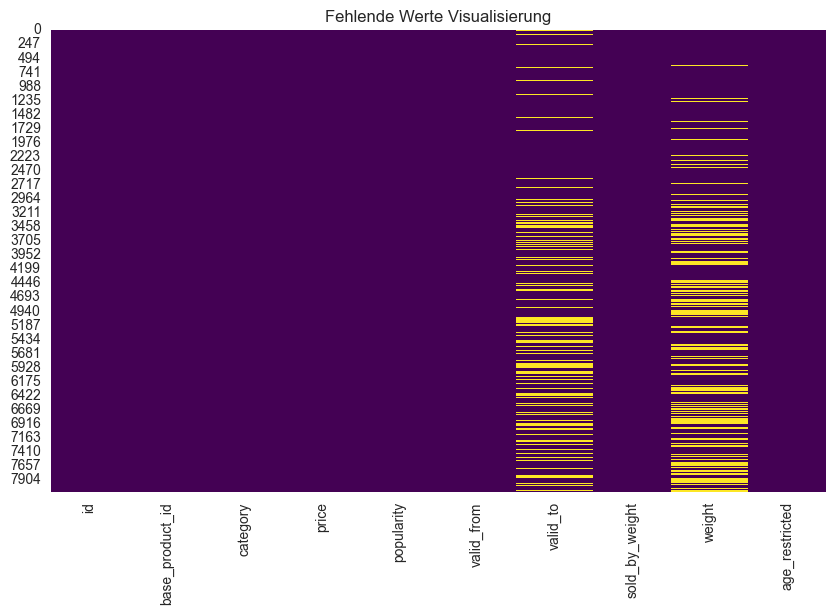

In [58]:
# Visualisierung fehlender Werte
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Fehlende Werte Visualisierung')
plt.show()

Hier wird angezeigt, wo die Werte fehlen.



Deskriptive Statistiken

In [59]:
# Numerische Spalten
num_cols = ['price', 'popularity', 'weight']
display(df[num_cols].describe().T)

,count,mean,std,min,25%,50%,75%,max
price,8120.0,6.705783,19.499932,1.900000e-01,1.790000,3.390000,8.490000,589.490000
popularity,8120.0,0.092119,0.056088,1.254813e-52,0.036610,0.101526,0.139815,0.192543
weight,5615.0,0.989429,0.854266,1.000000e-01,0.449525,0.750000,1.300000,7.847513


In [60]:
# Kategorische Spalten
cat_cols = ['category', 'sold_by_weight', 'age_restricted']
display(df[cat_cols].describe(include=['object']).T)

,count,unique,top,freq
category,8120,14,FRUITS_VEGETABLES,2155


Verteilungsanalyse

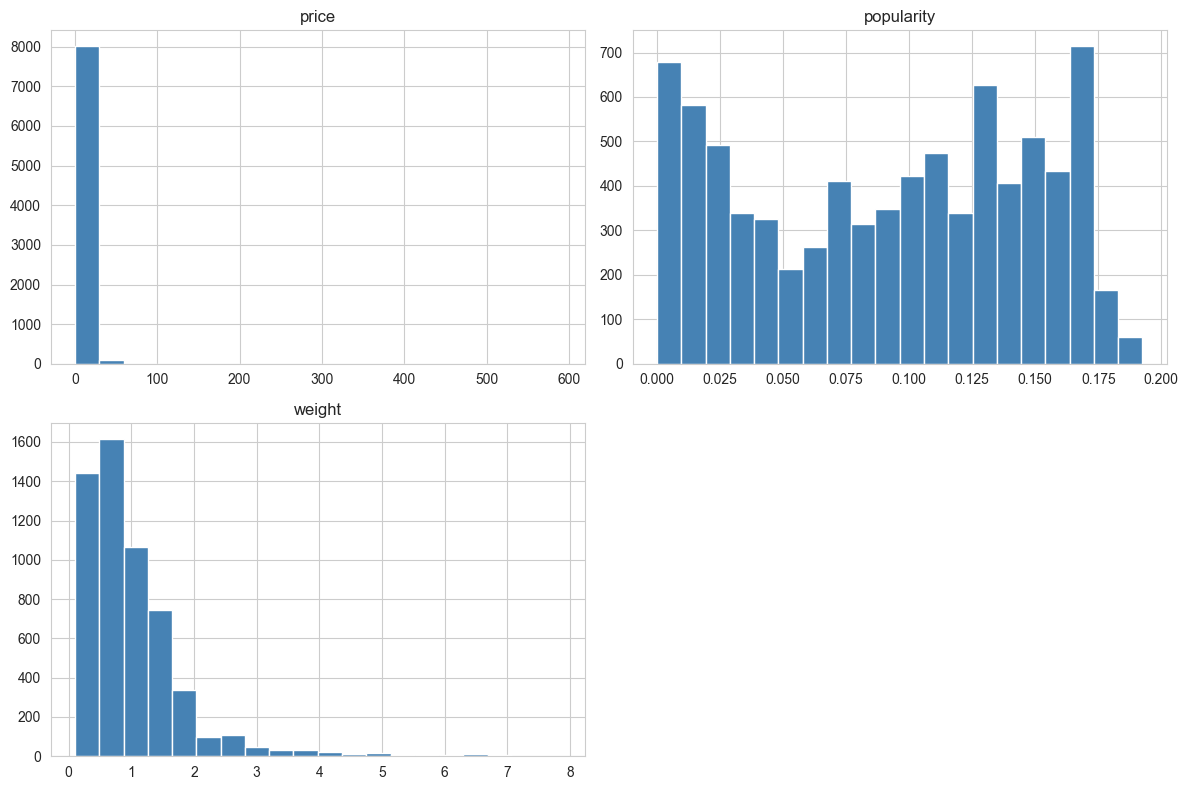

In [61]:
# Histogramme für numerische Spalten
df[num_cols].hist(figsize=(12, 8), bins=20, color='steelblue')
plt.tight_layout()
plt.show()

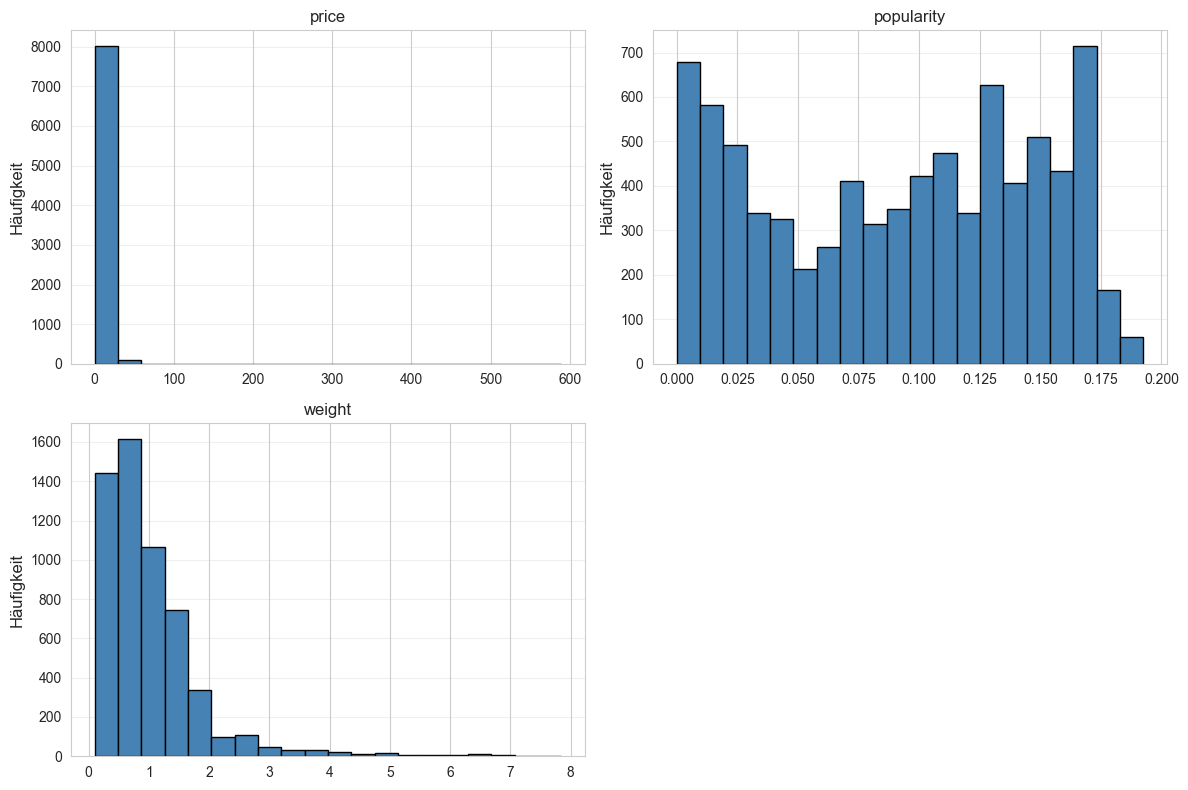

In [62]:

# Histogramme für numerische Spalten mit y-Achsen-Beschriftung
axes = df[num_cols].hist(
    figsize=(12, 8), 
    bins=20, 
    color='steelblue',
    edgecolor='black'  # Optional: Kantenlinien für bessere Abgrenzung
)

# Y-Achse beschriften und Layout anpassen
for ax in axes.flatten():  # Gehe durch alle Subplots
    ax.set_ylabel('Häufigkeit', fontsize=12)  # Y-Achsen-Beschriftung
    ax.grid(axis='y', alpha=0.3)  # Optional: Gitterlinien für bessere Lesbarkeit

plt.tight_layout()
plt.show()

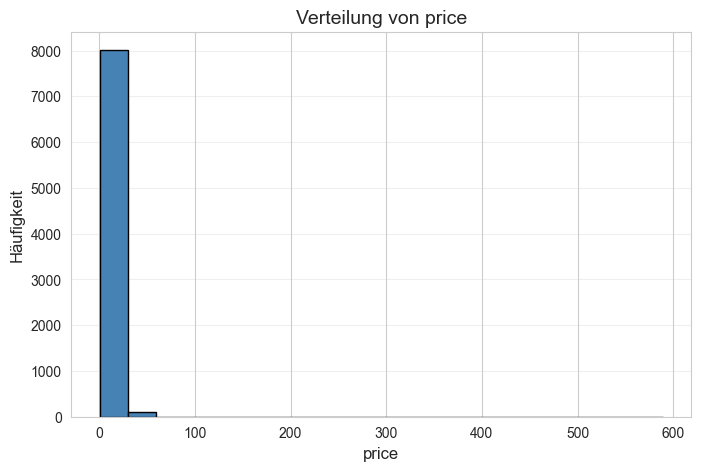

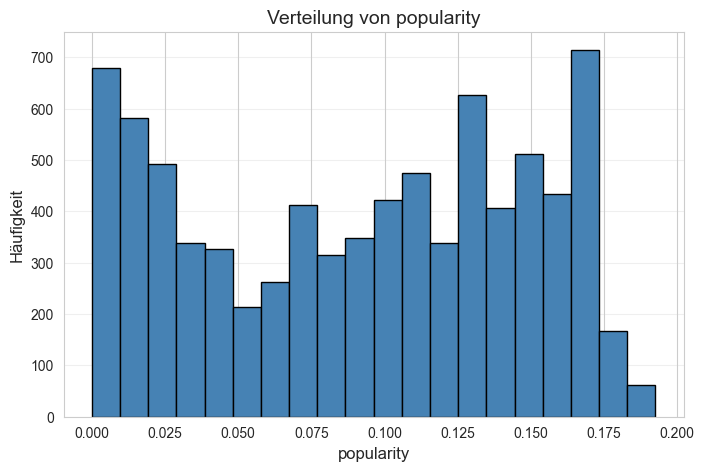

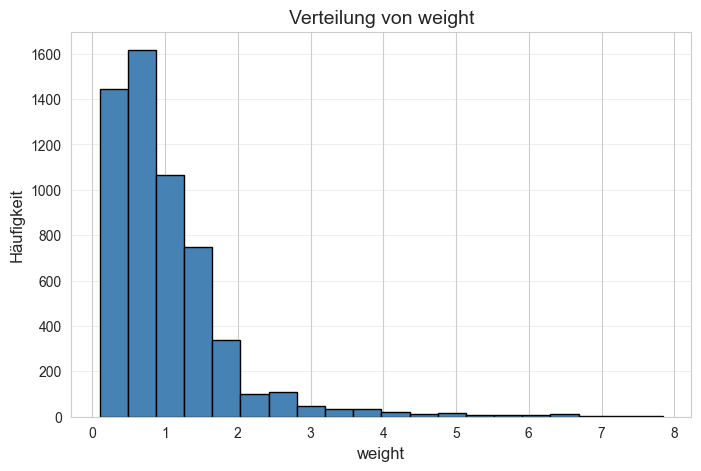

In [83]:
import matplotlib.pyplot as plt

for col in num_cols:
    plt.figure(figsize=(8, 5))  # Neue Figur für jede Spalte
    df[col].hist(
        bins=20,
        color='steelblue',
        edgecolor='black'
    )
    plt.title(f'Verteilung von {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Häufigkeit', fontsize=12)
    plt.grid(axis='y', alpha=0.3)
    plt.show()  # Zeigt jedes Histogramm einzeln an

Hier werden die Price ,popularity und weight visulaisiert.

<Figure size 1000x600 with 0 Axes>

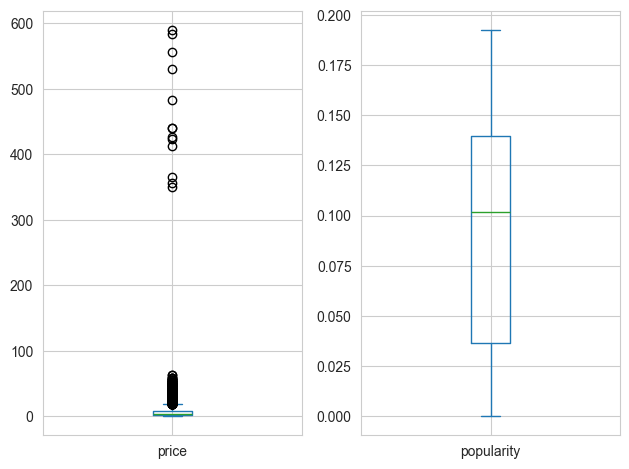

In [63]:
# Boxplots für Preise und Popularität
plt.figure(figsize=(10, 6))
df[['price', 'popularity']].plot(kind='box', subplots=True, layout=(1,2))
plt.tight_layout()
plt.show()


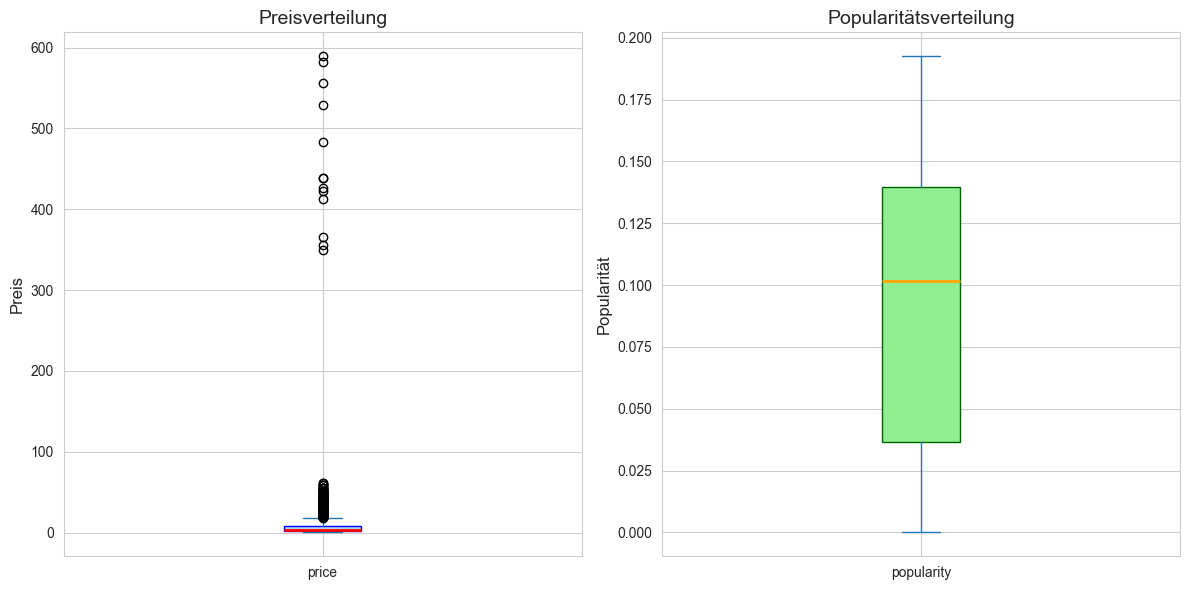

In [87]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Preis-Boxplot
df["price"].plot(
    kind="box",
    ax=axes[0],
    patch_artist=True,
    boxprops=dict(facecolor="lightblue", color="blue"),
    medianprops=dict(color="red", linewidth=2)
)
axes[0].set_ylabel("Preis", fontsize=12)
axes[0].set_title("Preisverteilung", fontsize=14)

# Popularität-Boxplot
df["popularity"].plot(
    kind="box",
    ax=axes[1],
    patch_artist=True,
    boxprops=dict(facecolor="lightgreen", color="darkgreen"),
    medianprops=dict(color="orange", linewidth=2)
)
axes[1].set_ylabel("Popularität", fontsize=12)
axes[1].set_title("Popularitätsverteilung", fontsize=14)

plt.tight_layout()
plt.show()

Boxplots für die beiden Spalten „price“ (Preis) und „popularity“ (Beliebtheit) eines DataFrames df
Diese Boxplots ermöglichen es, Ausreißer, Median, Quartile und die Verteilung der Werte in den jeweiligen Spalten visuell zu erfassen.

Kategorische Variablen Analyse

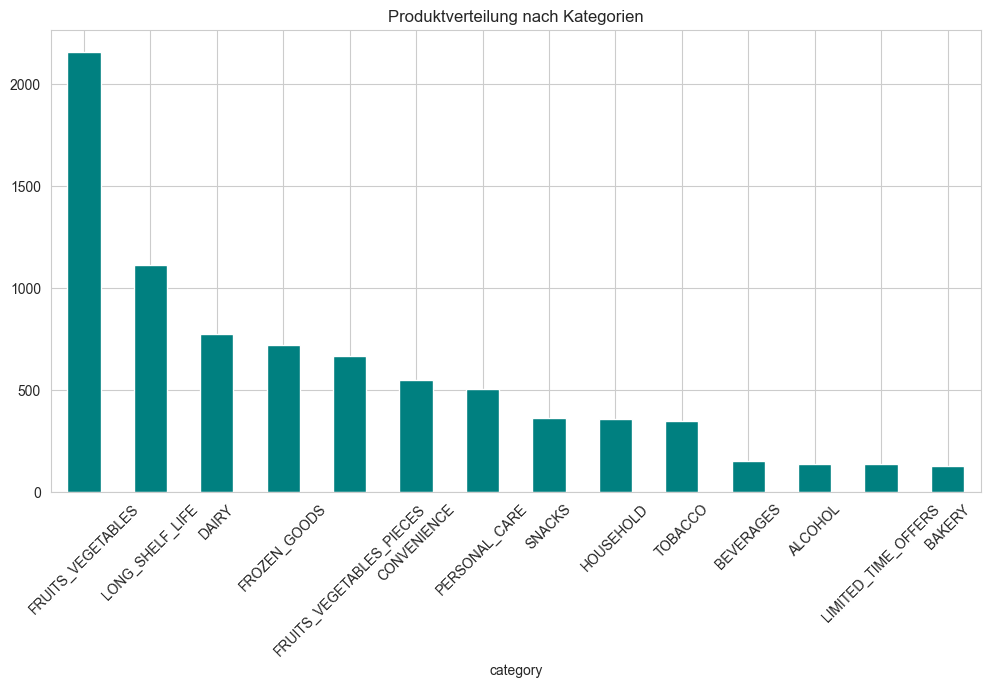

In [88]:
# Kategorienanalyse
plt.figure(figsize=(12, 6))
df['category'].value_counts().plot(kind='bar', color='teal')

plt.title('Produktverteilung nach Kategorien')
plt.xticks(rotation=45)
plt.show()


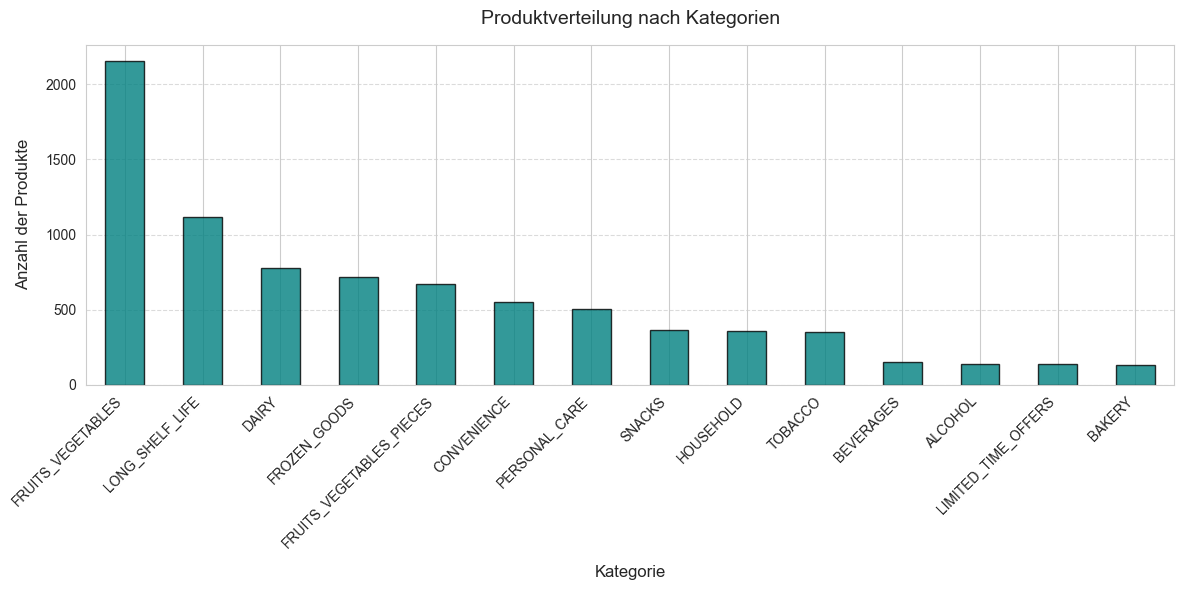

In [91]:

plt.figure(figsize=(12, 6))

# Balkendiagramm erstellen
ax = df['category'].value_counts().plot(
    kind='bar',
    color='teal',
    edgecolor='black',  # Randlinien für bessere Abgrenzung
    alpha=0.8           # Transparenz für Stil
)

# Y-Achse detailliert beschriften
ax.set_ylabel('Anzahl der Produkte', fontsize=12, labelpad=10)
ax.set_xlabel('Kategorie', fontsize=12, labelpad=10)

# Titel und Achsen anpassen
plt.title('Produktverteilung nach Kategorien', fontsize=14, pad=15)

# X-Achse lesbarer machen, falls Kategorienamen lang sind
plt.xticks(rotation=45, ha='right')

# Gitterlinien optional aktivieren
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Diese Visualisierung hilft dabei, schnell zu erkennen, welche Kategorien im Datensatz am häufigsten bzw. am seltensten vertreten sind. (Fruits_Vegetables)



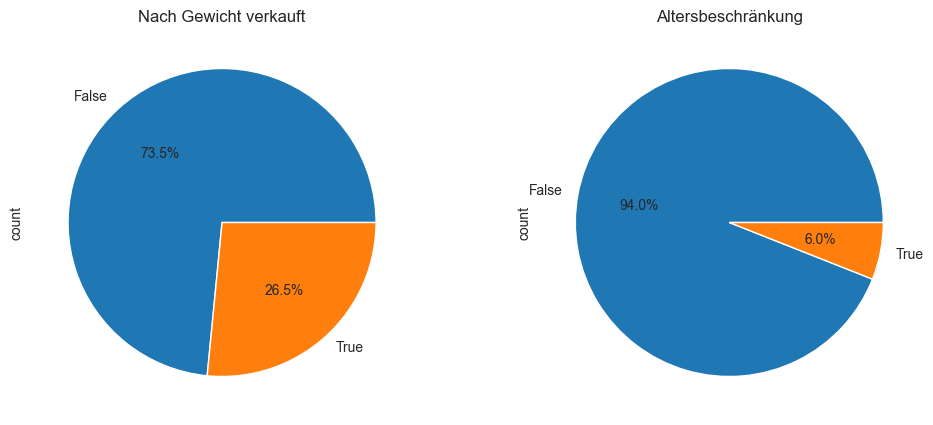

In [65]:
# Boolesche Variablen
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
df['sold_by_weight'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[0])
df['age_restricted'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=ax[1])
ax[0].set_title('Nach Gewicht verkauft')
ax[1].set_title('Altersbeschränkung')
plt.show()

Diese Darstellung gibt einen schnellen Überblick darüber, wie groß der Anteil an Produkten ist, die z. B. eine Altersfreigabe erfordern oder nach Gewicht verkauft werden.

## Preisanalyse


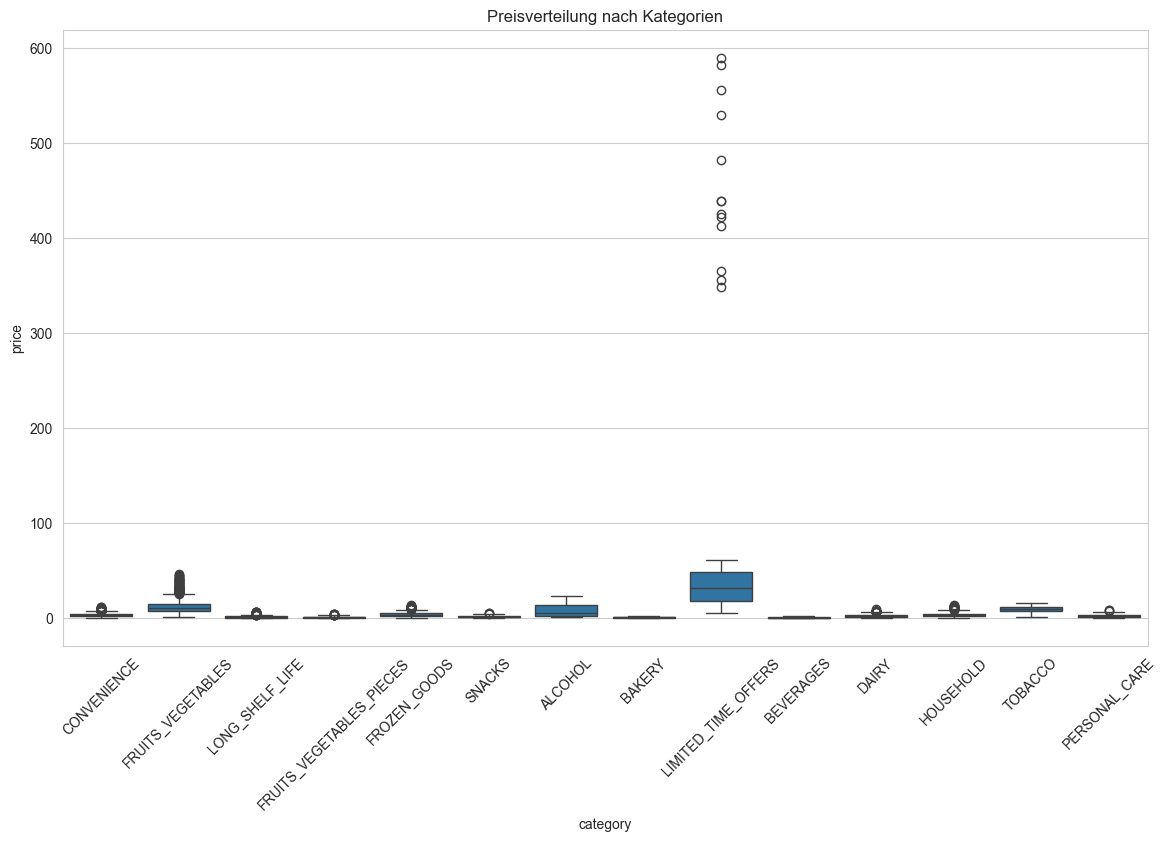

In [66]:
# Preisverteilung nach Kategorien
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='category', y='price')
plt.xticks(rotation=45)
plt.title('Preisverteilung nach Kategorien')
plt.show()

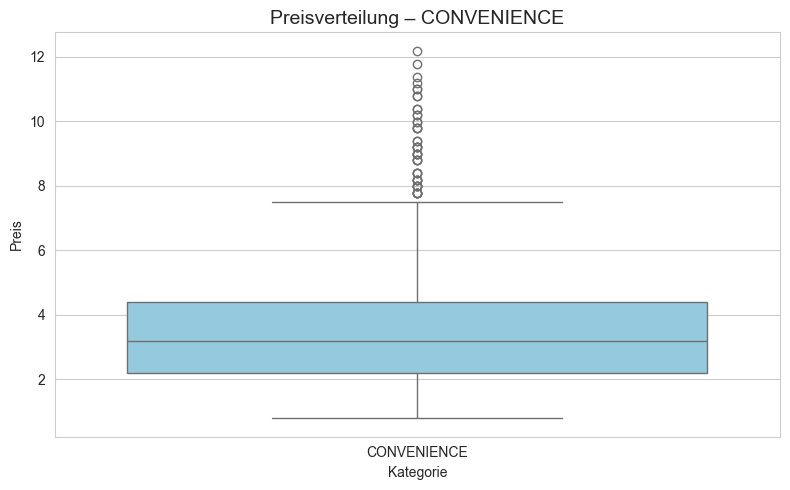

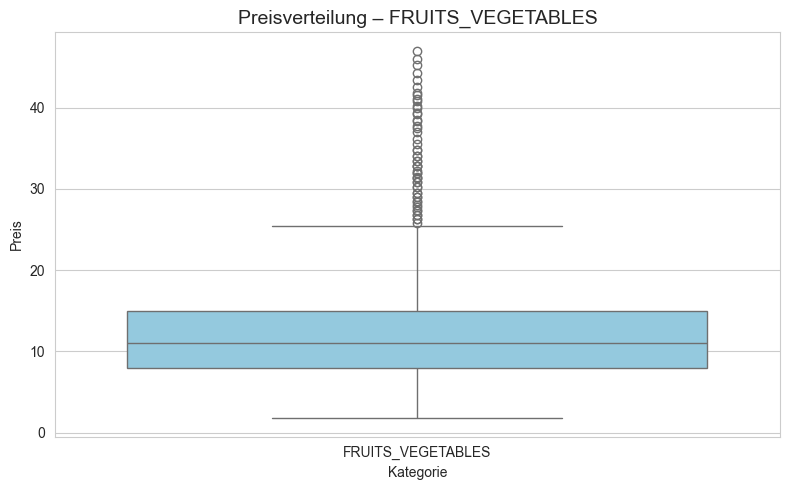

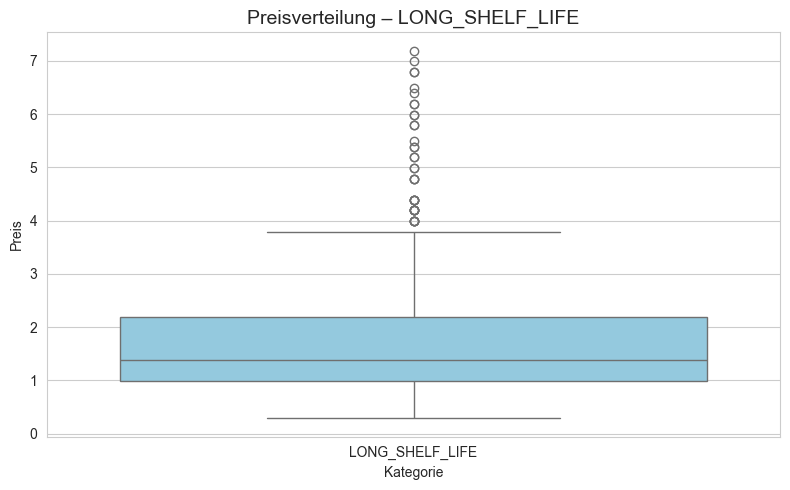

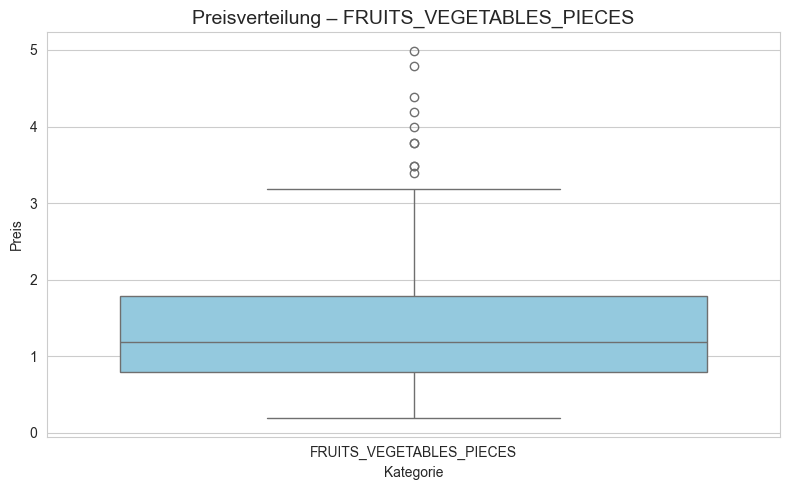

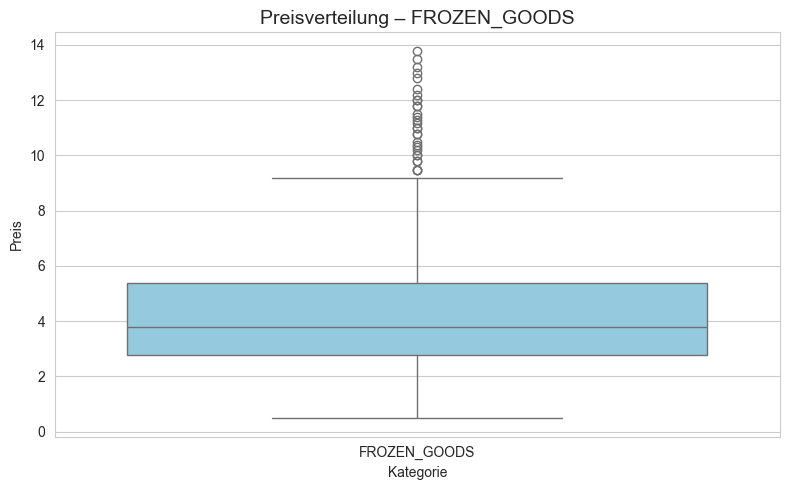

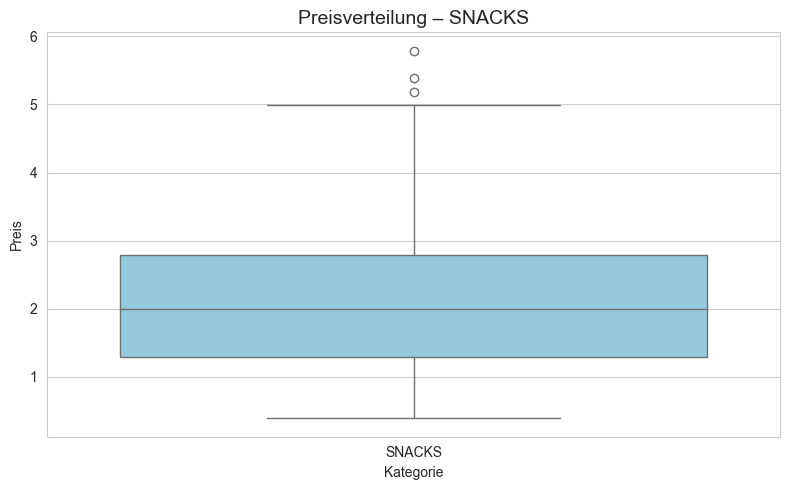

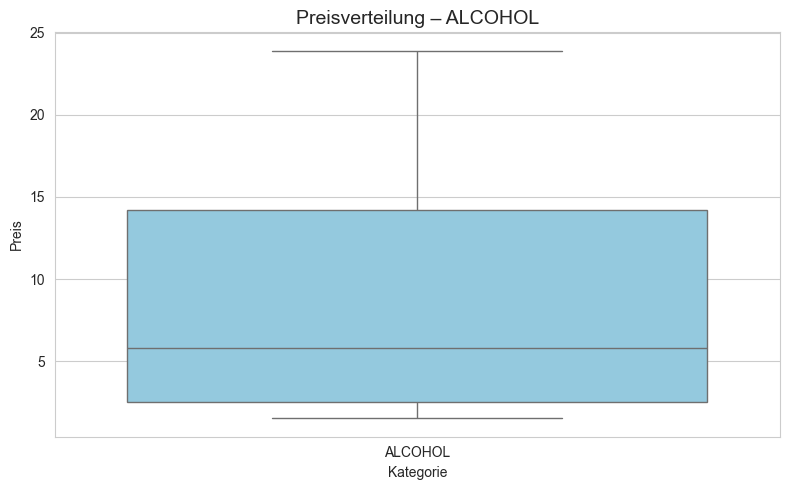

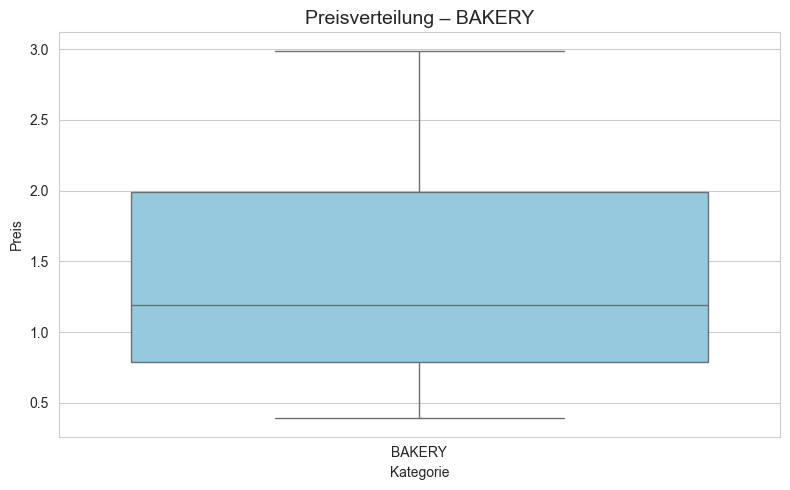

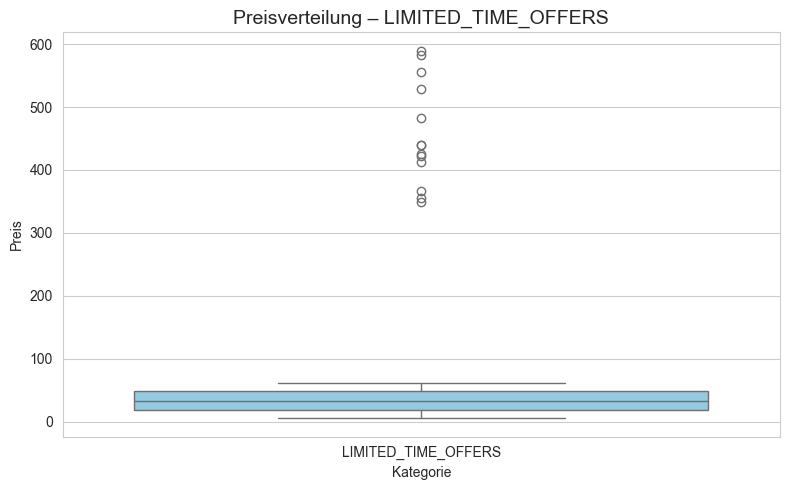

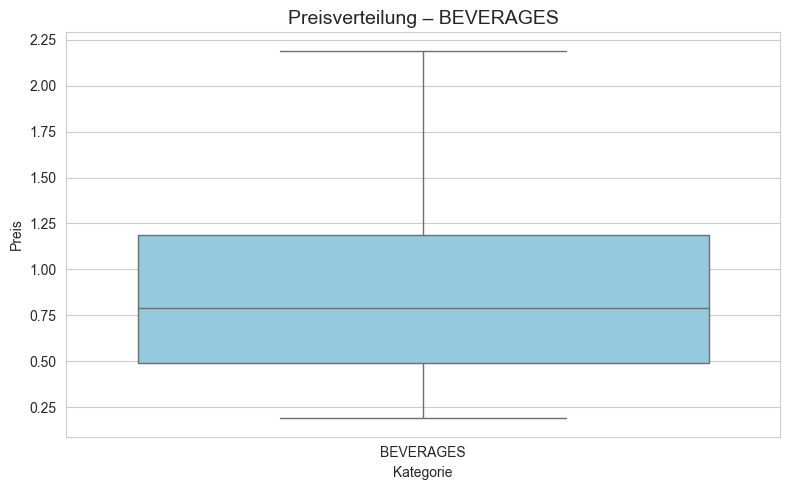

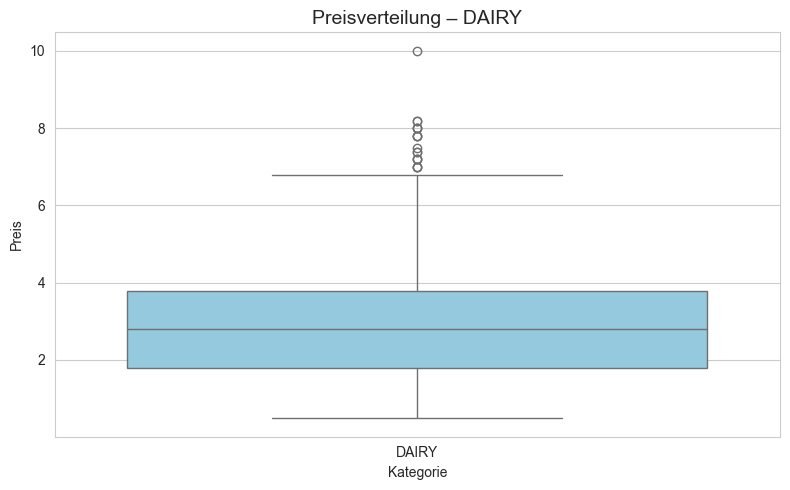

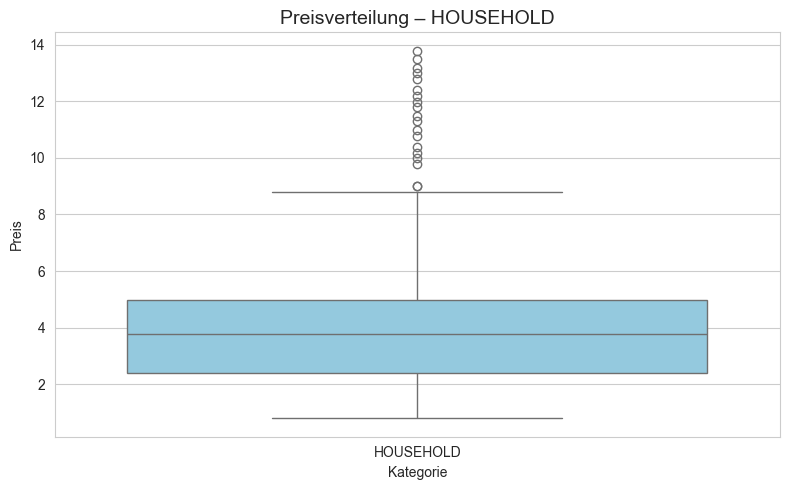

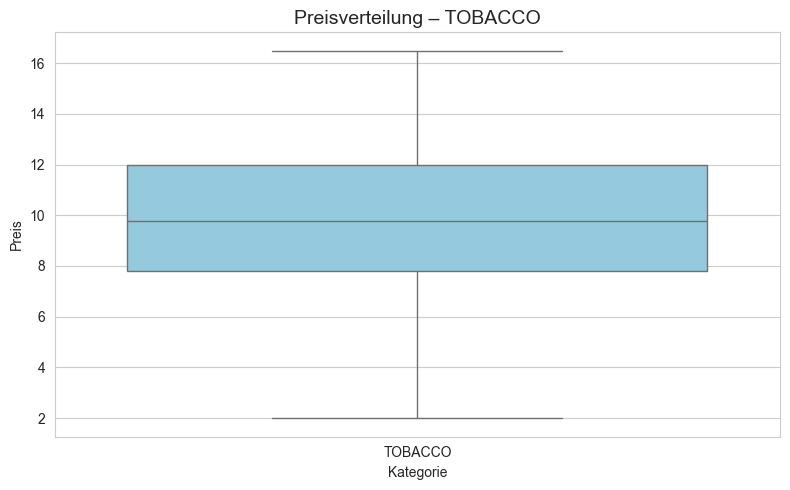

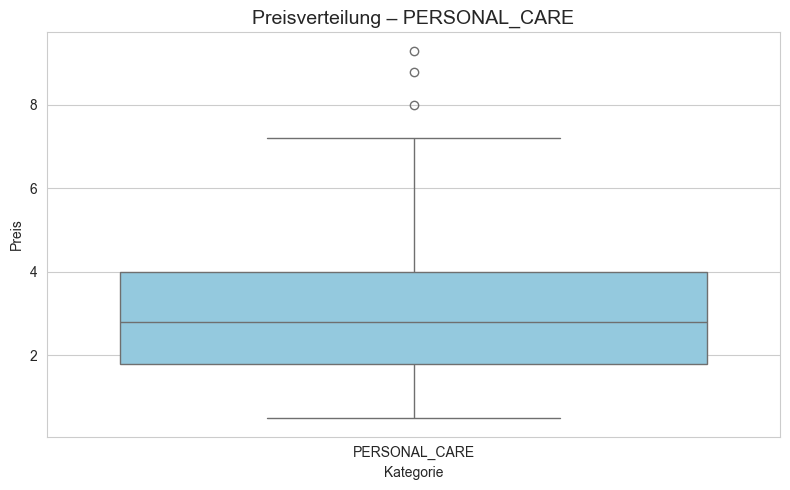

In [92]:
# Für jede Kategorie eine eigene Boxplot-Abbildung
categories = df['category'].unique()

for category in categories:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df[df['category'] == category], x='category', y='price', color='skyblue')
    
    plt.title(f'Preisverteilung – {category}', fontsize=14)
    plt.ylabel('Preis')
    plt.xlabel('Kategorie')
    plt.tight_layout()
    plt.show()


Mit dieser Darstellung lassen sich Preisunterschiede zwischen den Kategorien schnell erfassen und Auffälligkeiten wie teure Ausreißer identifizieren. (Limited_Time_OFFERS)

In [67]:
# Top 10 teuerste Produkte
display(df.nlargest(10, 'price')[['base_product_id', 'category', 'price']])

,base_product_id,category,price
1801,f2353db8-2b5f-46f1-97c4-2cc311f71cfd,LIMITED_TIME_OFFERS,589.49
344,d3845b3a-7a41-48fd-b547-c1167e3e713b,LIMITED_TIME_OFFERS,582.79
1064,b59abf32-f0b2-4a88-b35d-41f9c16c223a,LIMITED_TIME_OFFERS,556.00
1454,4f7c73b6-fca7-4f7d-8e38-9aa058e19a8d,LIMITED_TIME_OFFERS,529.39
2494,e79044b7-7842-4ba9-ba86-99d5c44552e7,LIMITED_TIME_OFFERS,482.79
684,7887c06a-ad84-4800-b066-ed02af4b579a,LIMITED_TIME_OFFERS,439.29
1145,bbd1c796-d4f0-4e3e-8d95-38d2679a1789,LIMITED_TIME_OFFERS,439.29
857,565c0e01-bd73-4f48-9605-f2b14ba496ad,LIMITED_TIME_OFFERS,425.99
2929,1b03cb66-ee17-4ce1-b997-736455cd7fdf,LIMITED_TIME_OFFERS,422.49
2905,e8ca76df-af2b-4cc1-8cd9-1e25087db9a7,LIMITED_TIME_OFFERS,412.49


Diese Übersicht hilft dabei, besonders hochpreisige Produkte zu identifizieren und ggf. zu analysieren, in welchen Kategorien diese vorkommen.

In [68]:
# Gültigkeitszeiträume analysieren
df['valid_from'] = pd.to_datetime(df['valid_from'])
df['valid_to'] = pd.to_datetime(df['valid_to'])
df['validity_days'] = (df['valid_to'] - df['valid_from']).dt.days

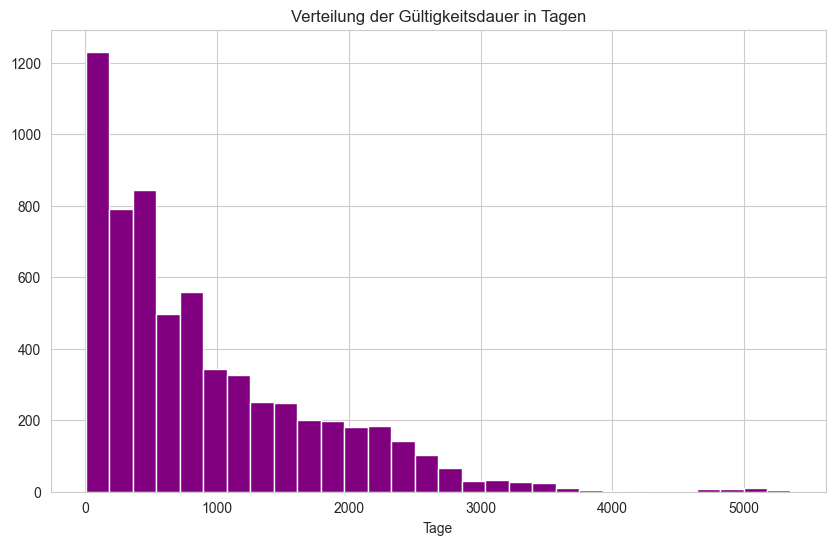

In [69]:
# Gültigkeitsdauer
plt.figure(figsize=(10, 6))
df['validity_days'].hist(bins=30, color='purple')
plt.title('Verteilung der Gültigkeitsdauer in Tagen')
plt.xlabel('Tage')
plt.show()

Dieses Diagramm hilft zu erkennen, wie lange Produkte im Durchschnitt gültig sind und ob es typische Laufzeiten oder Ausreißer gibt.



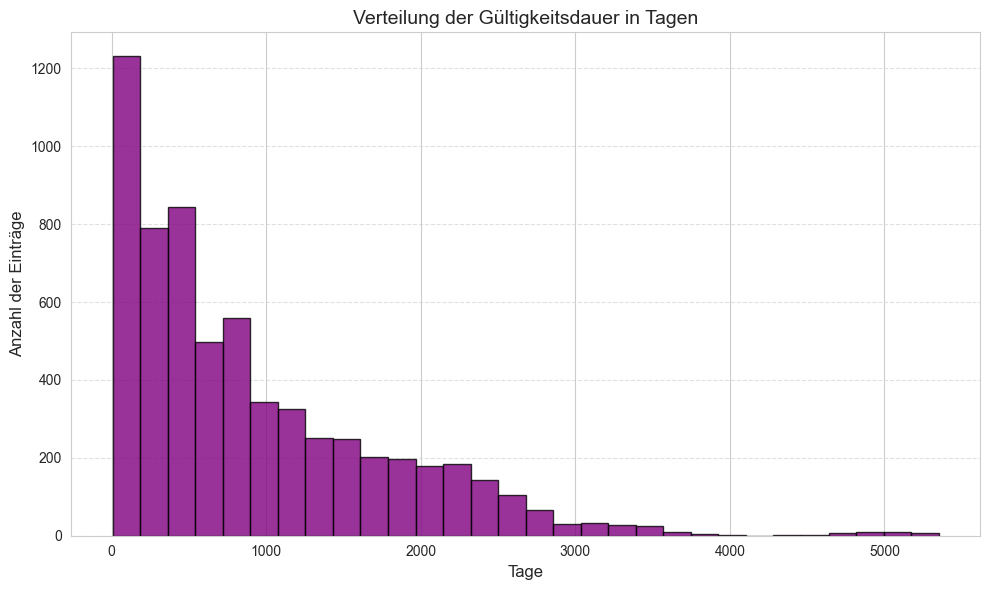

In [94]:
# Umwandlung in datetime, falls noch nicht geschehen
df['valid_from'] = pd.to_datetime(df['valid_from'])
df['valid_to'] = pd.to_datetime(df['valid_to'])

# Berechnung der Gültigkeitsdauer in Tagen
df['validity_days'] = (df['valid_to'] - df['valid_from']).dt.days

# Histogramm der Gültigkeitsdauer
plt.figure(figsize=(10, 6))
df['validity_days'].hist(bins=30, color='purple', edgecolor='black', alpha=0.8)

plt.title('Verteilung der Gültigkeitsdauer in Tagen', fontsize=14)
plt.xlabel('Tage', fontsize=12)
plt.ylabel('Anzahl der Einträge', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/3101789659.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.resample('M')['base_product_id'].count().plot(figsize=(12, 6))


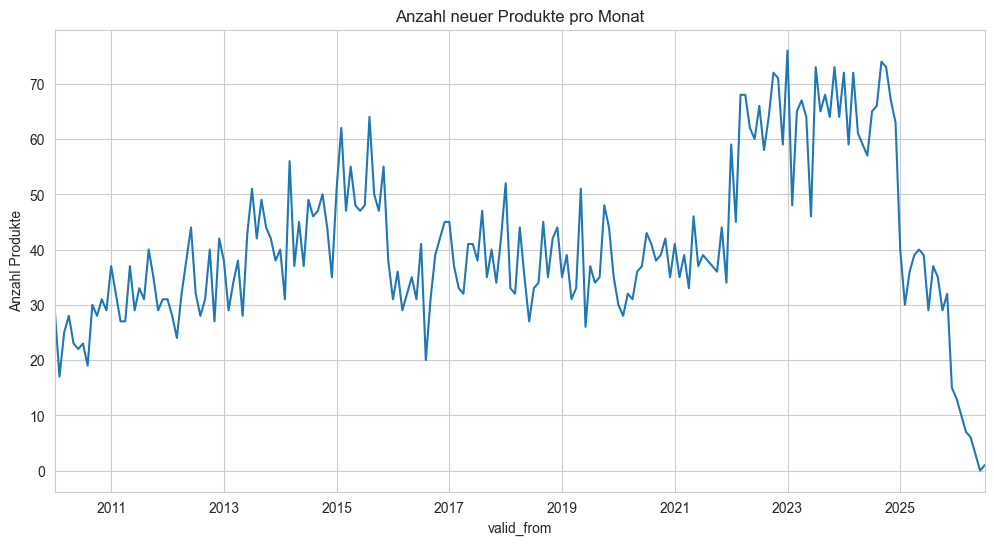

In [70]:
# Produkteinführungen über die Zeit
df.set_index('valid_from', inplace=True)
df.resample('M')['base_product_id'].count().plot(figsize=(12, 6))
plt.title('Anzahl neuer Produkte pro Monat')
plt.ylabel('Anzahl Produkte')
plt.show()
df.reset_index(inplace=True)


Diese Visualisierung zeigt saisonale Muster oder Trends in der Produkteinführung – z. B. Peaks vor Feiertagen oder rückläufige Phasen.

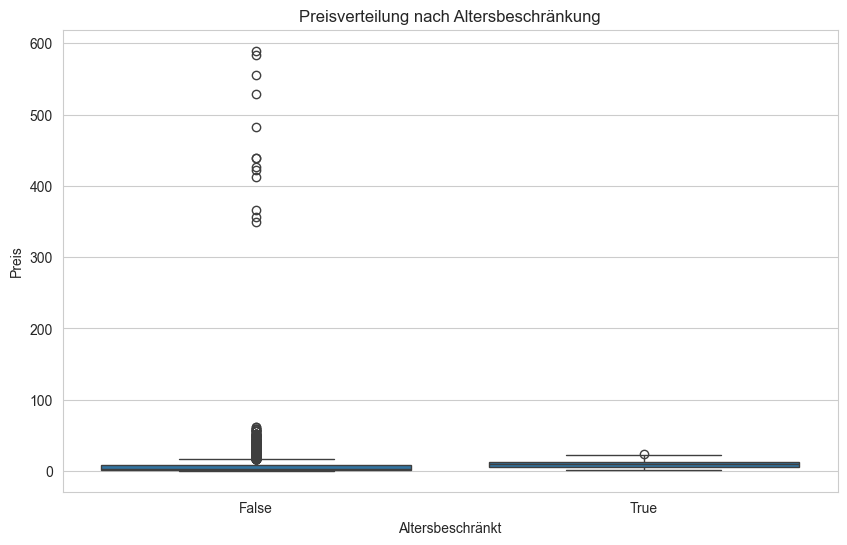

In [71]:
# Preisverteilung nach Altersbeschränkung
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='age_restricted', y='price')
plt.title('Preisverteilung nach Altersbeschränkung')
plt.xlabel('Altersbeschränkt')
plt.ylabel('Preis')
plt.show()

Diese Darstellung ermöglicht einen schnellen Vergleich, ob altersbeschränkte Produkte tendenziell teurer oder günstiger sind als nicht altersbeschränkte.

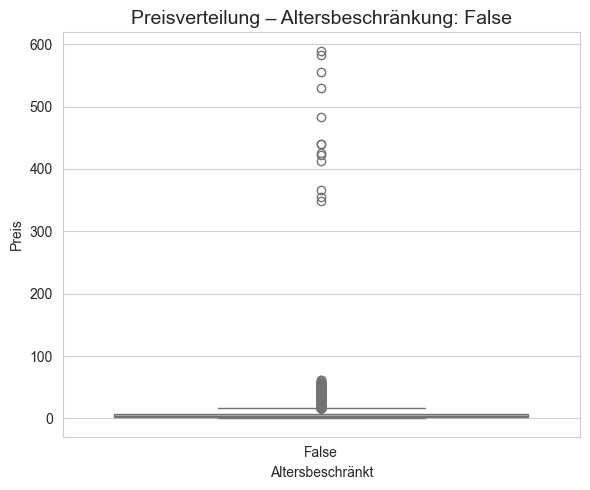

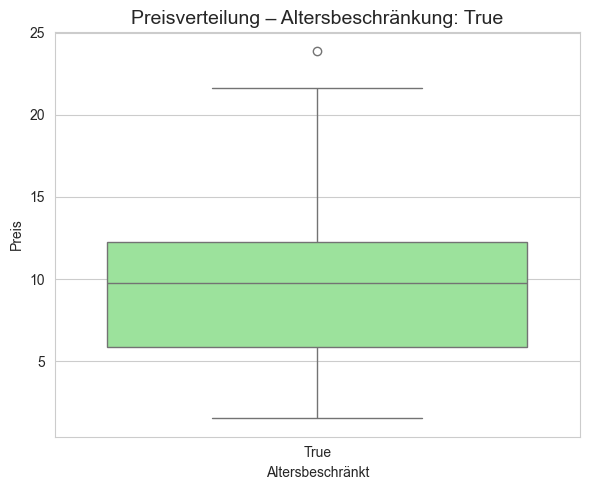

In [95]:
# Einzigartige Altersbeschränkungswerte extrahieren
age_groups = df['age_restricted'].unique()

# Für jede Altersgruppe eine eigene Abbildung erstellen
for age in age_groups:
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df[df['age_restricted'] == age], x='age_restricted', y='price', color='lightgreen')
    
    plt.title(f'Preisverteilung – Altersbeschränkung: {age}', fontsize=14)
    plt.xlabel('Altersbeschränkt')
    plt.ylabel('Preis')
    plt.tight_layout()
    plt.show()

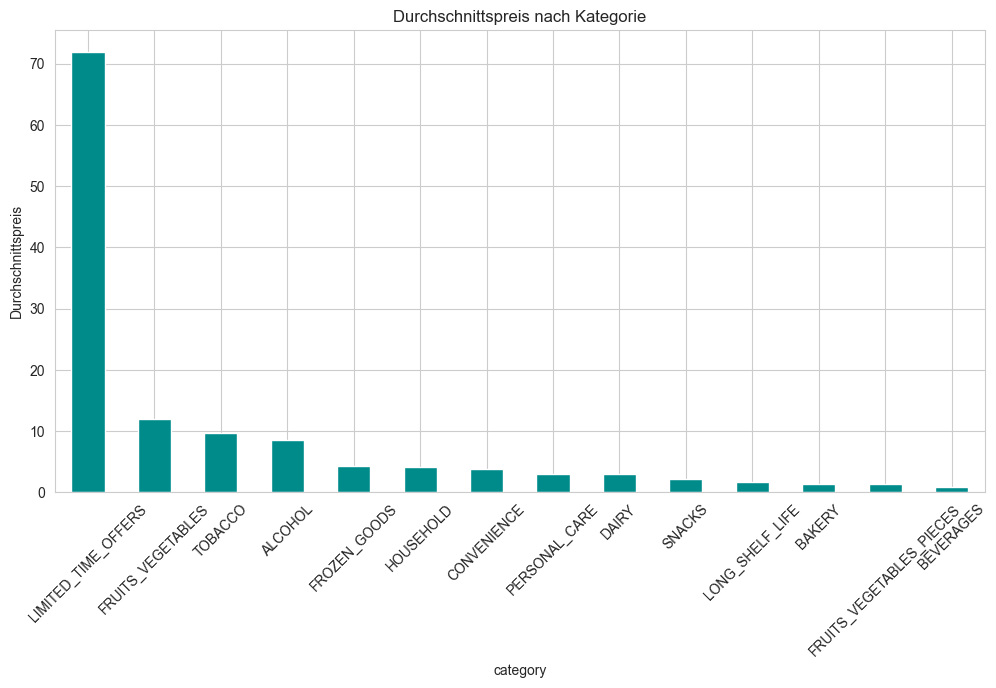

In [72]:
# Durchschnittspreis pro Kategorie
avg_price = df.groupby('category')['price'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_price.plot(kind='bar', color='darkcyan')
plt.title('Durchschnittspreis nach Kategorie')
plt.ylabel('Durchschnittspreis')
plt.xticks(rotation=45)
plt.show()



Diese Visualisierung hilft, die Kategorien mit den höchsten und niedrigsten Durchschnittspreisen schnell zu identifizieren.

## Korrelationen und Beziehungen


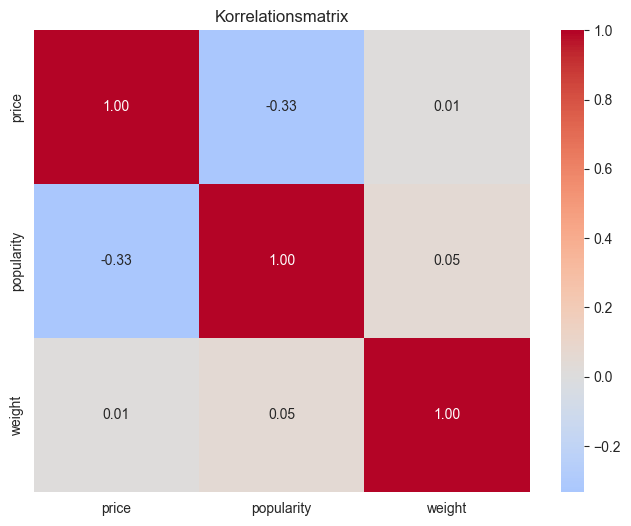

In [73]:
# Korrelation zwischen Preis, Popularität und Gewicht
corr = df[['price', 'popularity', 'weight']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Korrelationsmatrix')
plt.show()

Diese Visualisierung zeigt auf einen Blick, wie stark Preis, Popularität und Gewicht miteinander korrelieren, und hilft, mögliche Zusammenhänge zu erkennen.

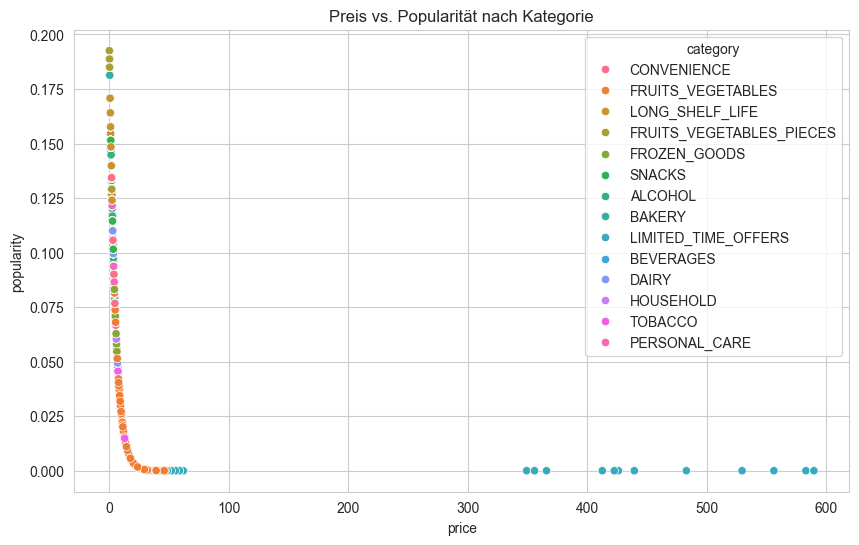

In [74]:
# Preis vs. Popularität
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='price', y='popularity', hue='category')
plt.title('Preis vs. Popularität nach Kategorie')
plt.show()

Dieses Diagramm bietet eine visuelle Möglichkeit, zu erkennen, ob es eine Beziehung zwischen dem Preis und der Popularität gibt und ob diese Beziehung innerhalb unterschiedlicher Produktkategorien variiert.



## Gewichtsanalyse

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/2515304157.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='Set2')


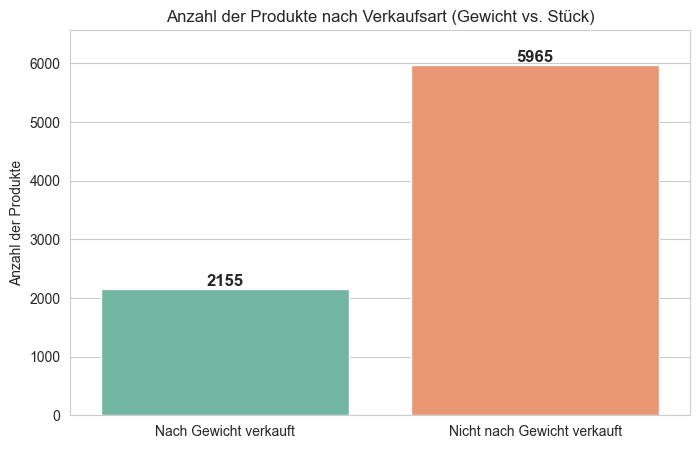

In [75]:
# Zähle True/False in der Spalte 'sold_by_weight'
num_weight_products = df['sold_by_weight'].sum()  # True = 1
num_non_weight_products = len(df) - num_weight_products

# Daten für das Diagramm
counts = {
    'Nach Gewicht verkauft': num_weight_products,
    'Nicht nach Gewicht verkauft': num_non_weight_products
}

# Visualisierung
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=list(counts.keys()), y=list(counts.values()), palette='Set2')
plt.ylabel('Anzahl der Produkte')
plt.title('Anzahl der Produkte nach Verkaufsart (Gewicht vs. Stück)')

# Werte über den Balken anzeigen
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,  # X-Position: Mitte des Balkens
        height + 1,                         # Y-Position: etwas über dem Balken
        f'{int(height)}',                   # Der Text (Zahl)
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.ylim(0, max(counts.values()) * 1.1)  # Platz nach oben für die Textanzeige
plt.show()

Diese Visualisierung hilft,Anzahl der Produkte nach Verkaufsart (Gewicht vs. Stück).

## Popularitätsanalyse


/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/471459642.py:35: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


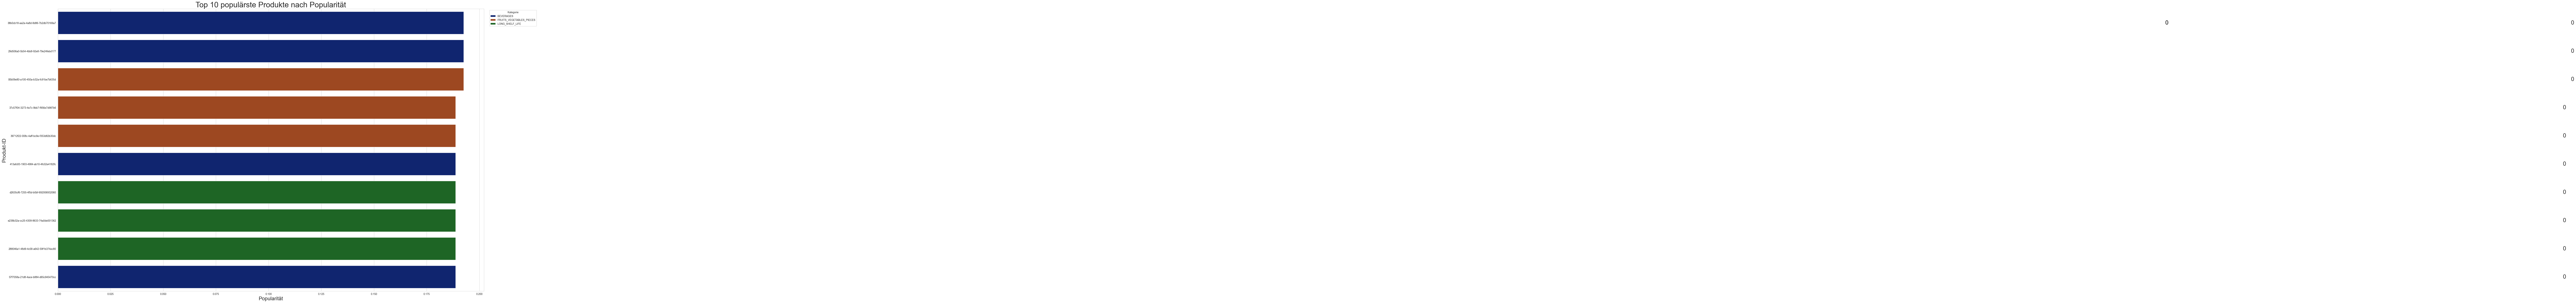

In [76]:
# Top 10 populärste Produkte auswählen
top_popular = df.nlargest(10, 'popularity')[['base_product_id', 'category', 'price', 'popularity']]

# Setze Stil (dunkleres Theme für bessere Lesbarkeit)
sns.set_style("whitegrid")

# Große Abbildung erzeugen
plt.figure(figsize=(30, 20))  # Breiter und höher

# Balkendiagramm zeichnen
barplot = sns.barplot(
    data=top_popular,
    x='popularity',
    y='base_product_id',
    hue='category',
    dodge=False,
    palette='dark'  # dunklere Farben
)

# Achsentitel und Haupttitel
plt.xlabel('Popularität', fontsize=20)
plt.ylabel('Produkt-ID', fontsize=20)
plt.title('Top 10 populärste Produkte nach Popularität', fontsize=30)

# Lege die Legende außerhalb des Plots
plt.legend(title='Kategorie', bbox_to_anchor=(1.01, 1), loc='upper left')

# Zahlen am Ende der Balken anzeigen
for bar in barplot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 1, y, f'{int(width)}', va='center', fontsize=22)

# Reduziere Leerraum
plt.tight_layout()

# Diagramm anzeigen
plt.show()

In [77]:
# Top 10 populärste Produkte
top_popular = df.nlargest(10, 'popularity')[['base_product_id', 'category', 'price', 'popularity']]
display(top_popular)

,base_product_id,category,price,popularity
98,38b0cb18-aa2a-4a8d-8d86-7b2db70169a7,BEVERAGES,0.19,0.192543
461,29d506a0-5b54-4bb8-92e8-79e24febd177,BEVERAGES,0.19,0.192543
2638,00b09e80-a100-450a-b32a-fc91be7b635d,FRUITS_VEGETABLES_PIECES,0.19,0.192543
17,37c57f04-3273-4e7c-9bb7-f956e7d987b6,FRUITS_VEGETABLES_PIECES,0.29,0.188730
72,39712f22-008c-4aff-bc9e-f353d82b30dc,FRUITS_VEGETABLES_PIECES,0.29,0.188730
306,413afc83-1903-4984-ab10-4fc02e4182fc,BEVERAGES,0.29,0.188730
329,d2635cf6-7255-4f5d-b0bf-692006932060,LONG_SHELF_LIFE,0.29,0.188730
532,e238b32a-cc25-4309-8633-74a0de001362,LONG_SHELF_LIFE,0.29,0.188730
588,288046a1-48d9-4c58-a642-59f1b374ec80,LONG_SHELF_LIFE,0.29,0.188730
909,57f7058a-21d8-4ace-b884-d65c945470cc,BEVERAGES,0.29,0.188730


<Figure size 1200x800 with 0 Axes>

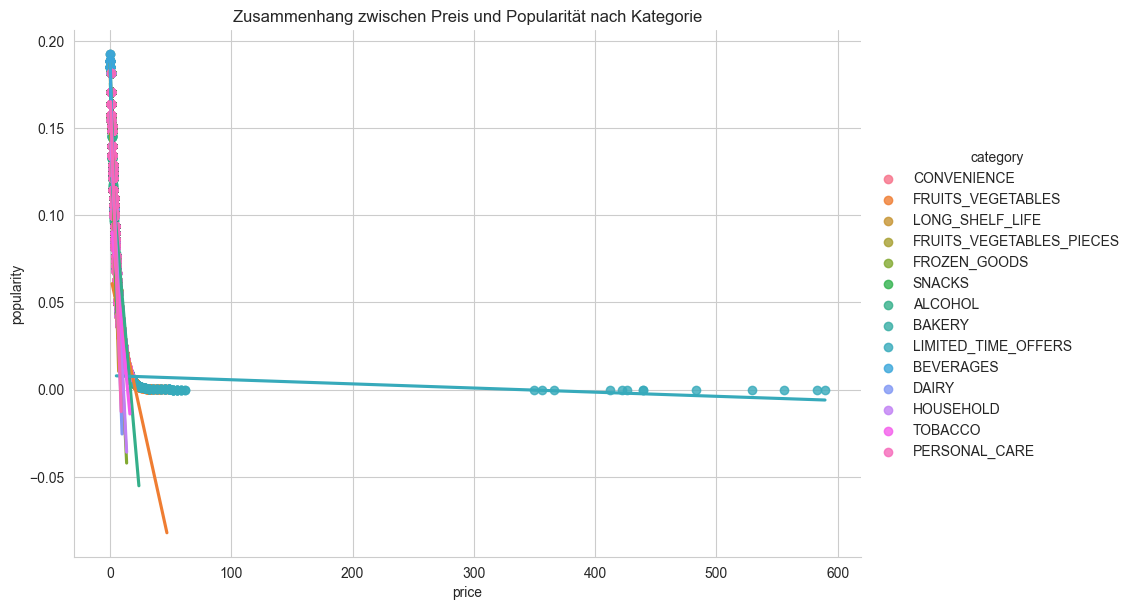

In [78]:
# Zusammenhang zwischen Preis und Popularität nach Kategorie
plt.figure(figsize=(12, 8))
sns.lmplot(data=df, x='price', y='popularity', hue='category', 
           height=6, aspect=1.5, ci=None)
plt.title('Zusammenhang zwischen Preis und Popularität nach Kategorie')
plt.show()


Das Diagramm zeigt den Zusammenhang zwischen Preis und Popularität für verschiedene Kategorien. Jede Kategorie wird durch eine andere Farbe dargestellt, und es wird eine lineare Regressionslinie für jede Kategorie gezeichnet, um zu veranschaulichen, wie der Preis die Popularität beeinflusst. Das Diagramm enthält keine Konfidenzintervalle, sodass nur die lineare Beziehung angezeigt wird.

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/3864297995.py:43: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


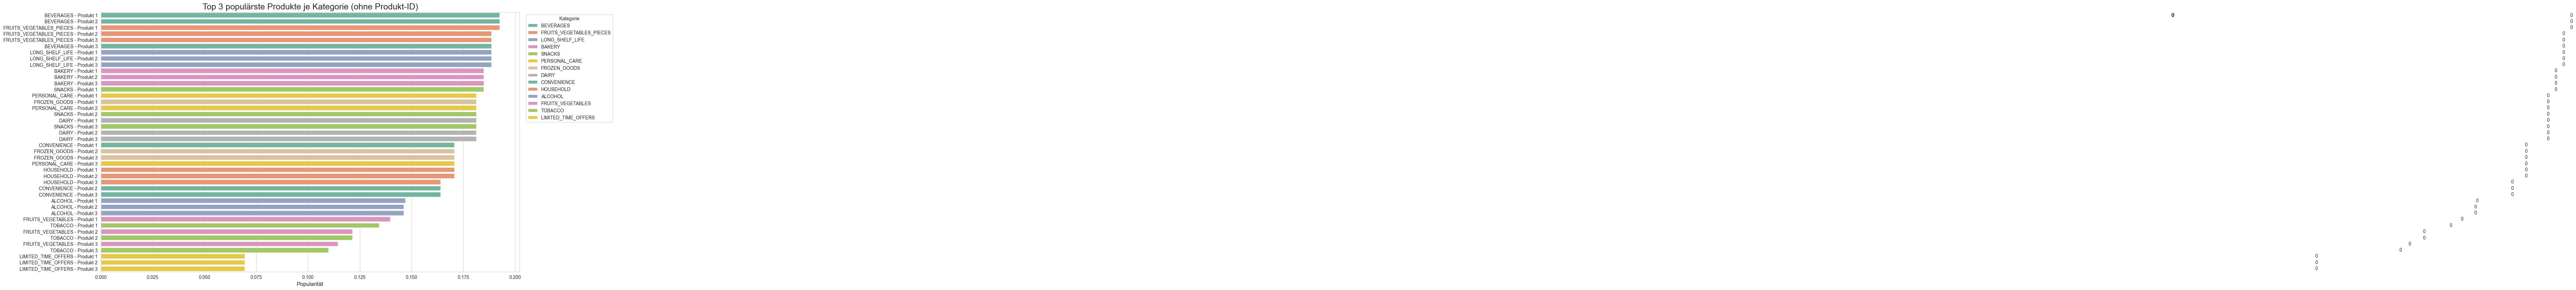

In [98]:
# Stil setzen
sns.set_style("whitegrid")

# Top 3 Produkte je Kategorie nach Popularität
top_per_category = (
    df.sort_values('popularity', ascending=False)
      .groupby('category')
      .head(3)
      .copy()
)

# Dummy-Labels erzeugen (z. B. "Produkt 1", "Produkt 2", ...)
top_per_category['Produkt'] = top_per_category.groupby('category').cumcount() + 1
top_per_category['Produkt'] = top_per_category['Produkt'].astype(str)

# Kombinierter Label für Darstellung (optional)
top_per_category['Label'] = top_per_category['category'] + ' - Produkt ' + top_per_category['Produkt']

# Balkendiagramm
plt.figure(figsize=(16, 10))
barplot = sns.barplot(
    data=top_per_category,
    x='popularity',
    y='Label',
    hue='category',
    dodge=False,
    palette='Set2'
)

# Titel & Achsen
plt.title('Top 3 populärste Produkte je Kategorie (ohne Produkt-ID)', fontsize=18)
plt.xlabel('Popularität', fontsize=12)
plt.ylabel('')

# Werte an den Balken anzeigen
for bar in barplot.patches:
    width = bar.get_width()
    y = bar.get_y() + bar.get_height() / 2
    plt.text(width + 1, y, f'{int(width)}', va='center', fontsize=10)

# Legende anpassen
plt.legend(title='Kategorie', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.show()

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


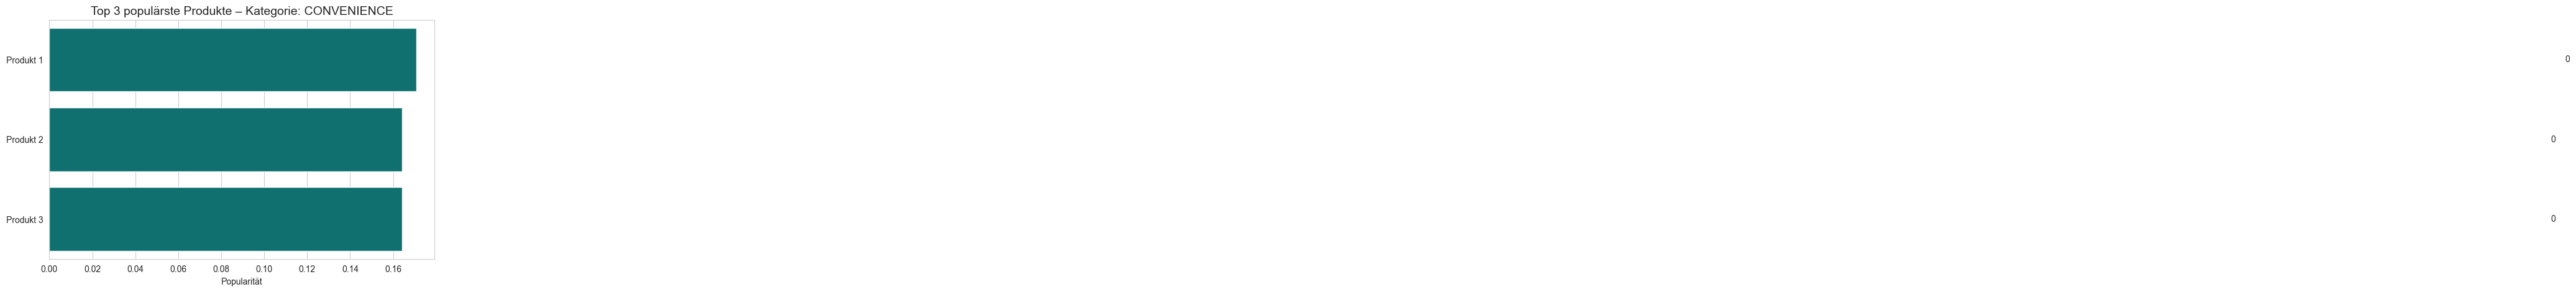

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


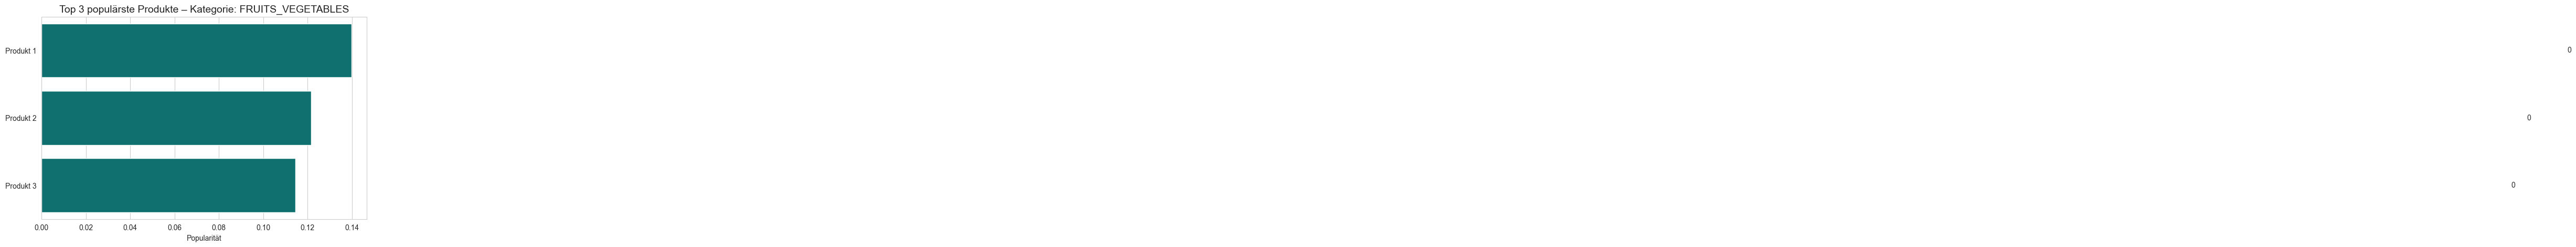

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


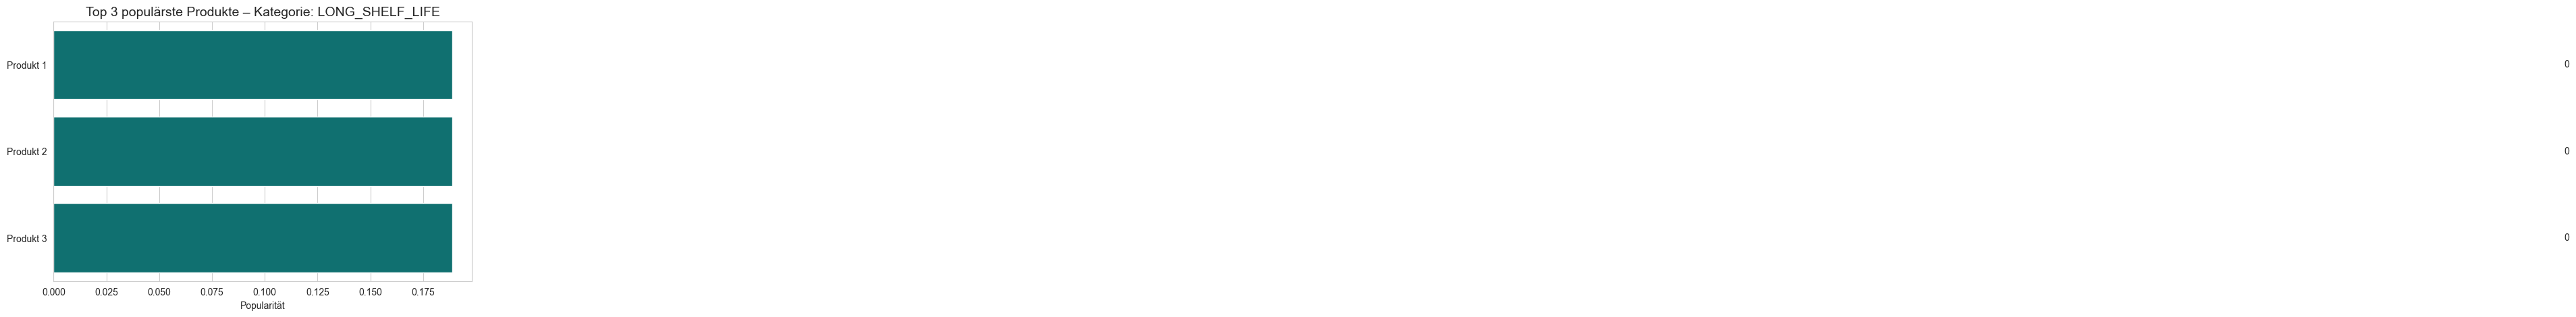

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


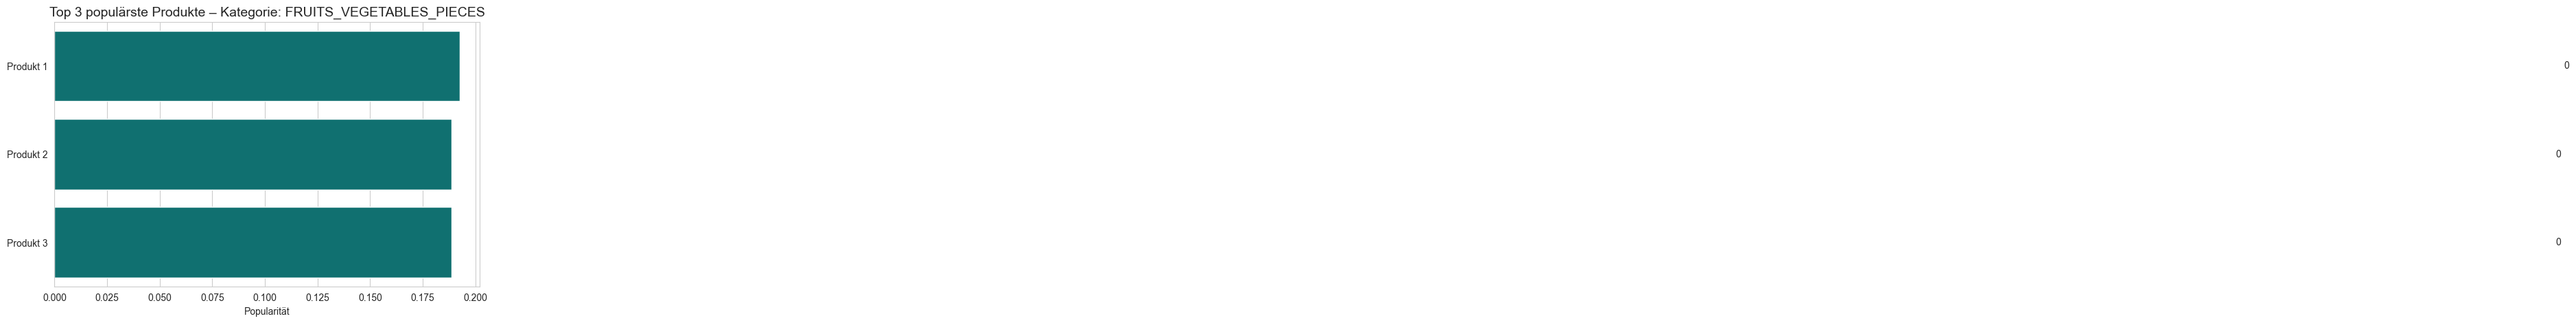

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


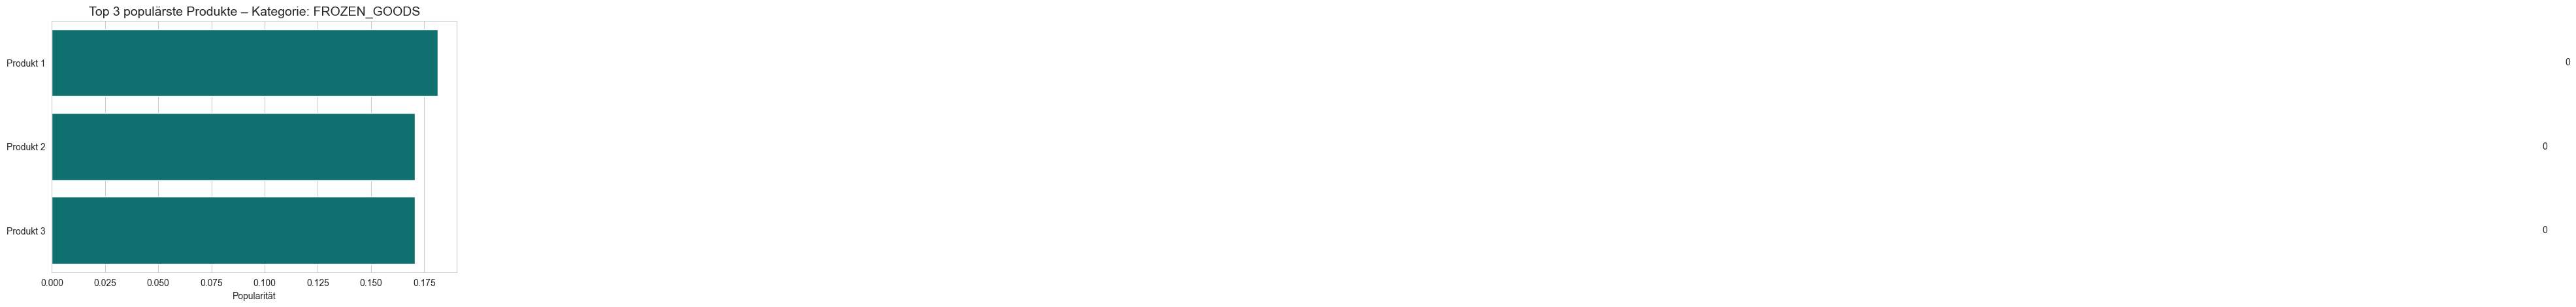

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


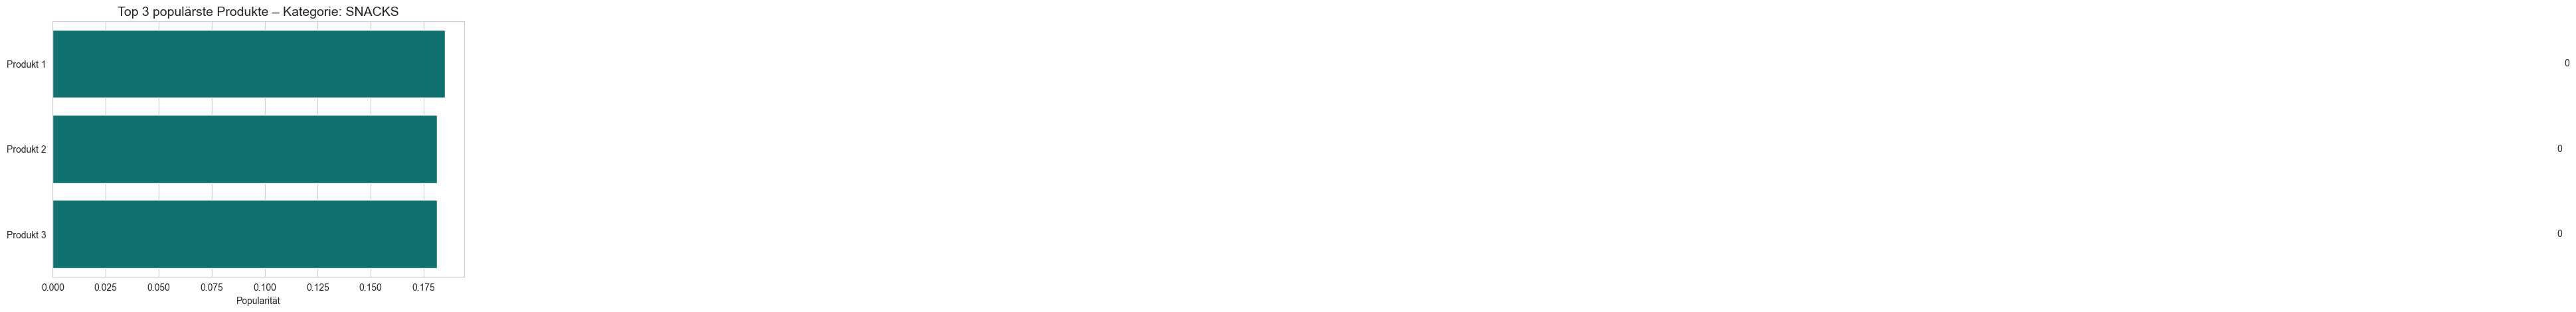

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


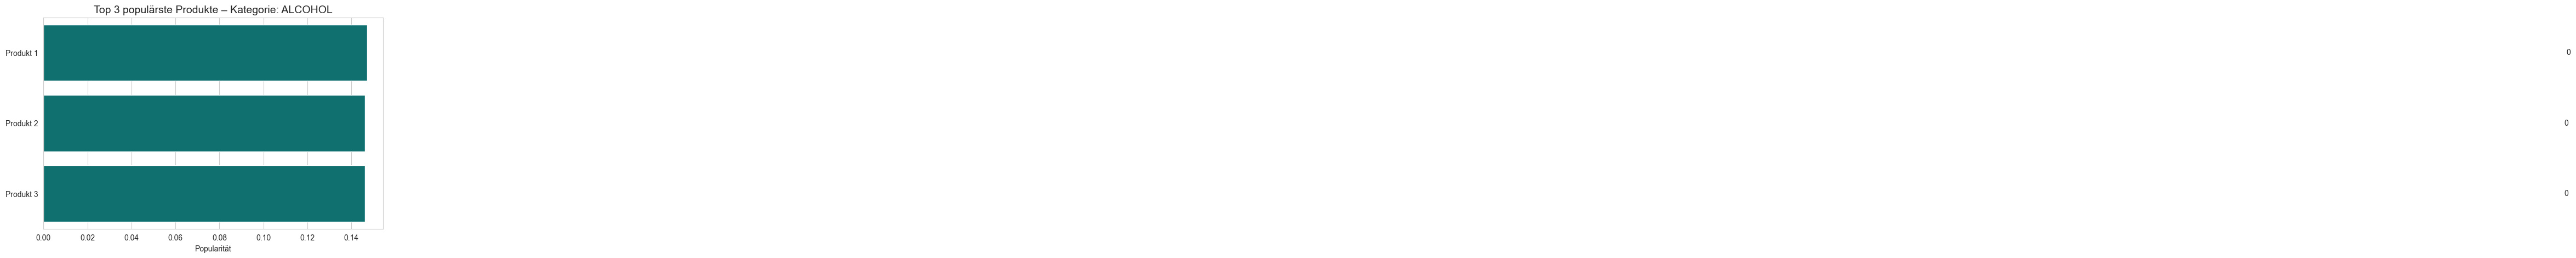

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


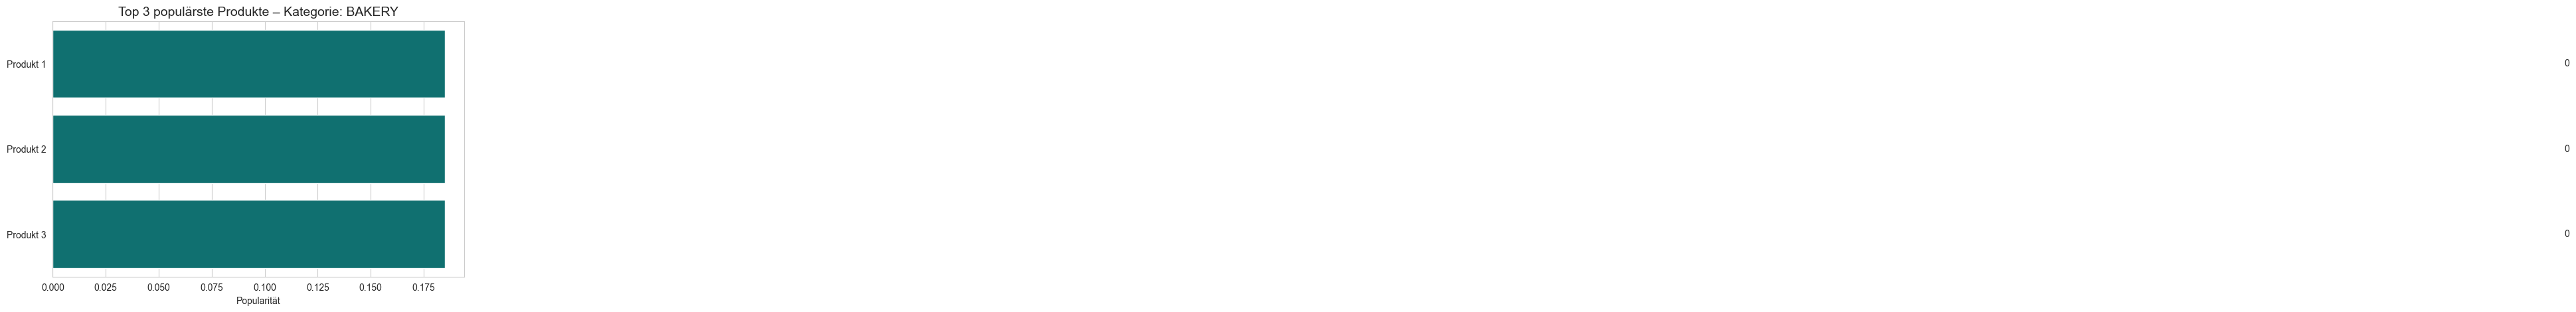

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


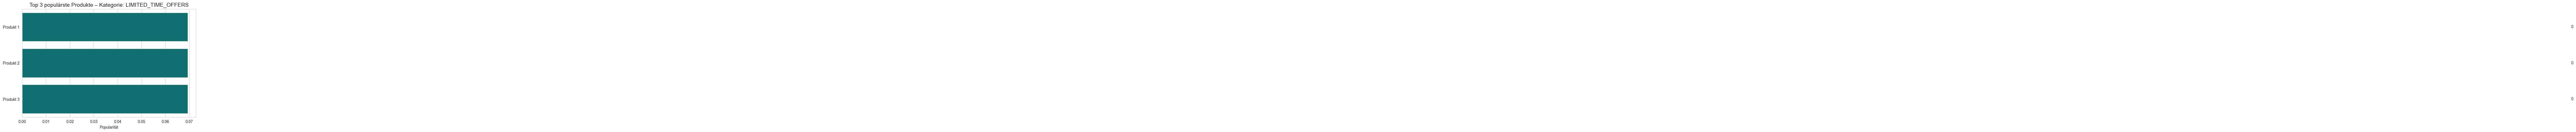

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


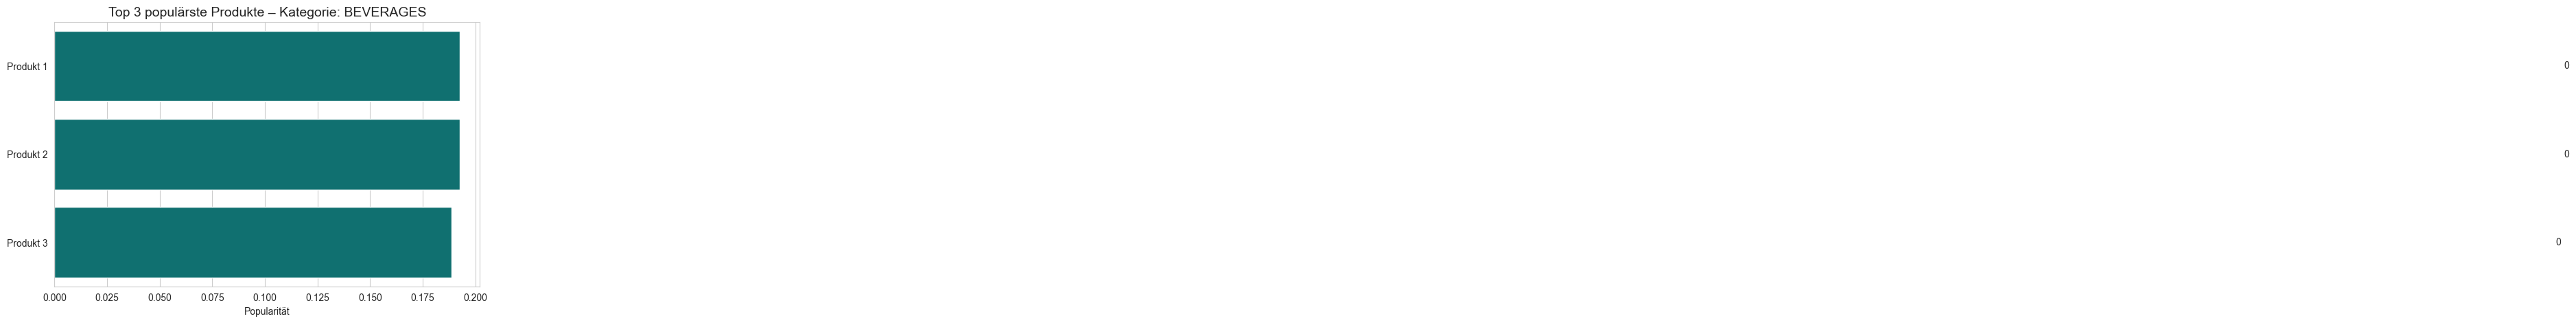

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


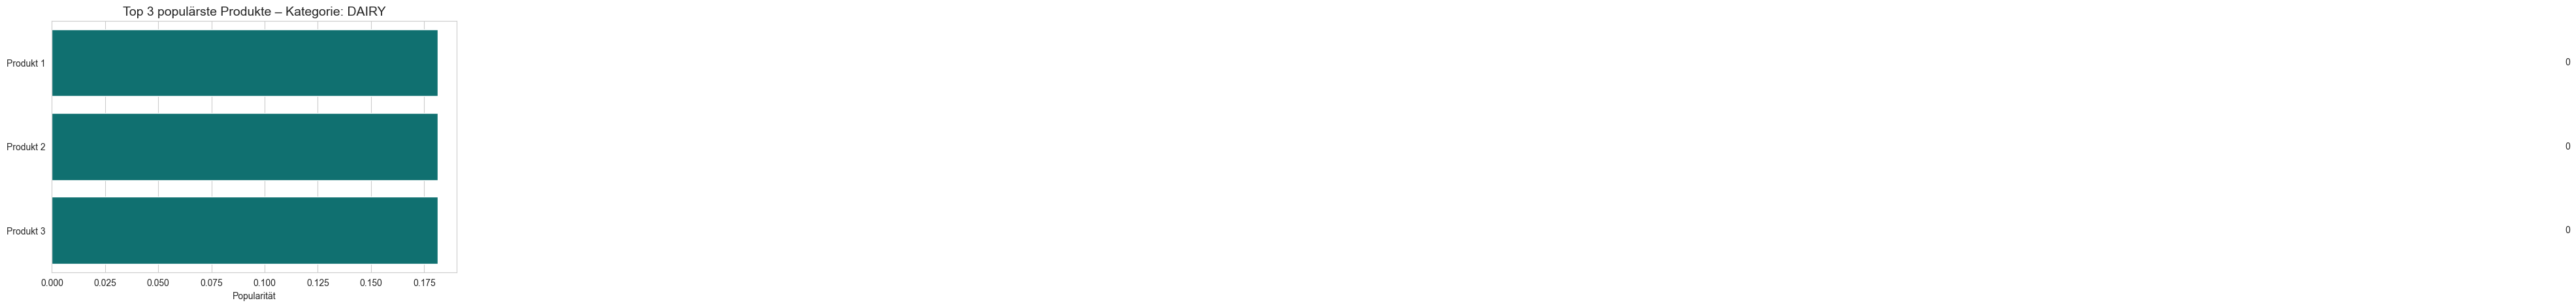

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


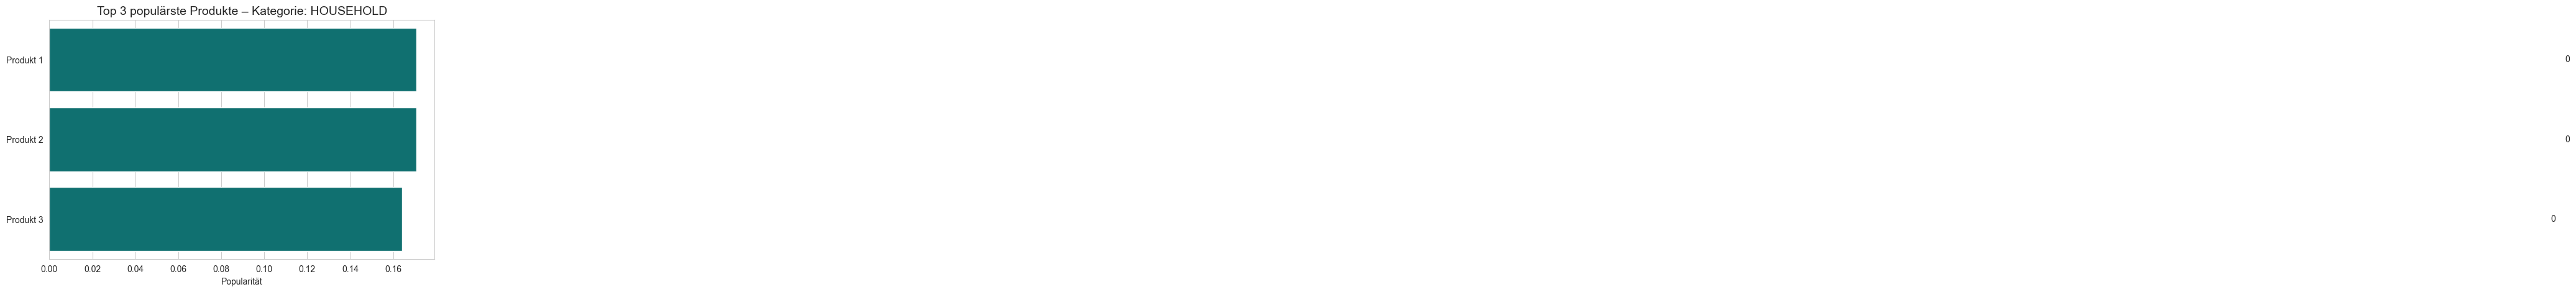

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


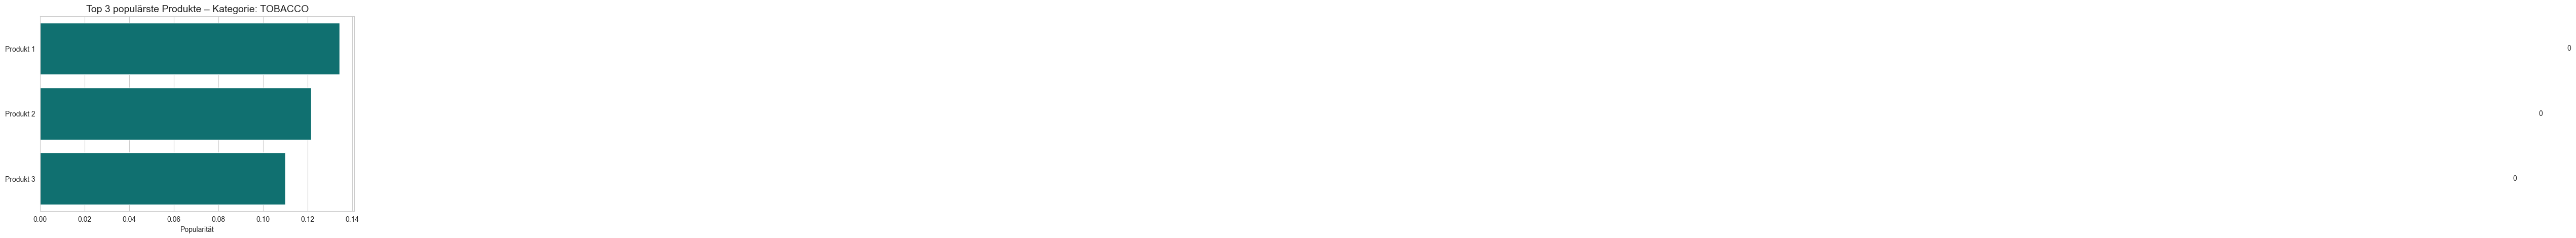

/var/folders/nk/jy2j9nbj137d0klkt1lyfbfw0000gn/T/ipykernel_79269/1892327565.py:39: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


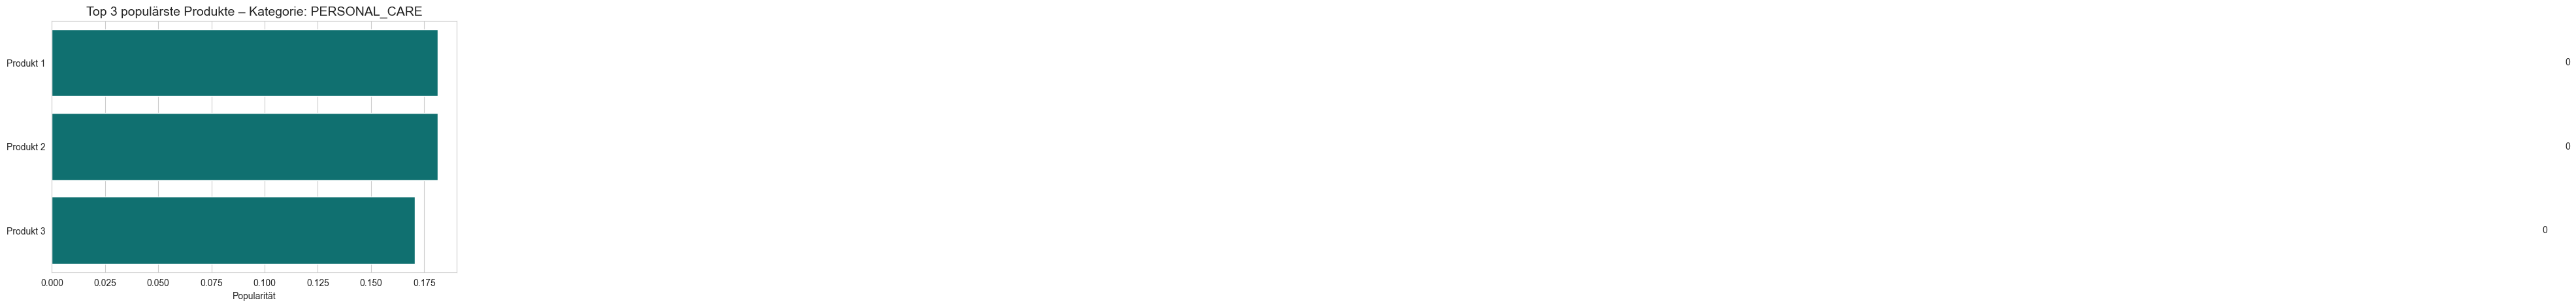

In [103]:
# Stil setzen
sns.set_style("whitegrid")

# Alle eindeutigen Kategorien durchlaufen
for category in df['category'].unique():
    # Top 3 Produkte innerhalb der aktuellen Kategorie
    top_products = (
        df[df['category'] == category]
        .sort_values('popularity', ascending=False)
        .head(3)
        .copy()
    )
    
    if top_products.empty:
        continue  # Falls keine Daten vorhanden sind, überspringen

    # Dummy-Labels (z. B. "Produkt 1", "Produkt 2", ...)
    top_products['Produkt'] = 'Produkt ' + (top_products.reset_index().index + 1).astype(str)

    # Plot erzeugen
    plt.figure(figsize=(8, 5))
    barplot = sns.barplot(
        data=top_products,
        x='popularity',
        y='Produkt',
        color='teal'
    )

    plt.title(f'Top 3 populärste Produkte – Kategorie: {category}', fontsize=14)
    plt.xlabel('Popularität')
    plt.ylabel('')

    # Werte an Balken
    for bar in barplot.patches:
        width = bar.get_width()
        y = bar.get_y() + bar.get_height() / 2
        plt.text(width + 1, y, f'{int(width)}', va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

## Zeitliche Analyse der Produkteinführungen


In [79]:
# Produkteinführungen pro Jahr/Monat
df['year'] = df['valid_from'].dt.year
df['month'] = df['valid_from'].dt.month

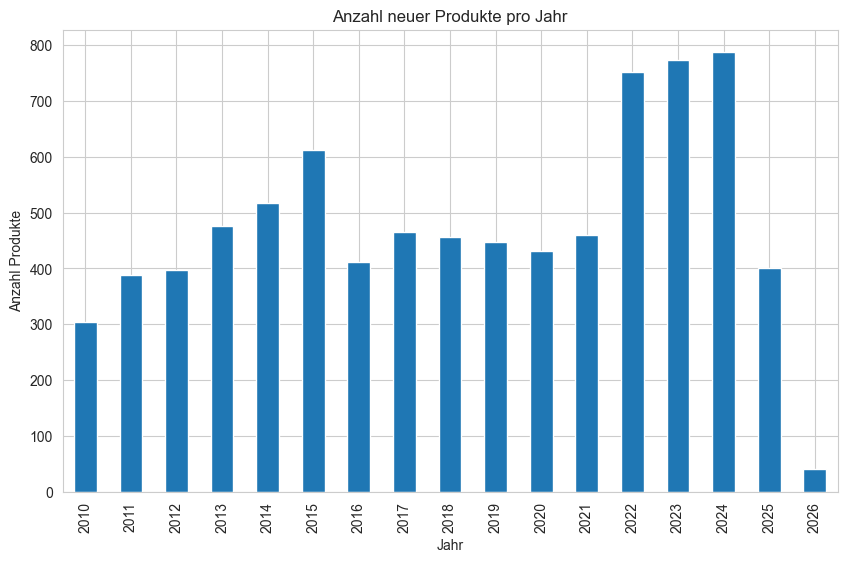

In [80]:
# Produkteinführungen pro Jahr
plt.figure(figsize=(10, 6))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Anzahl neuer Produkte pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl Produkte')
plt.show()

Das Balkendiagramm zeigt, wie viele neue Produkte jedes Jahr eingeführt wurden. Du siehst auf der x-Achse die Jahre und auf der y-Achse die Anzahl der Produkteinführungen in jedem Jahr. Dies gibt dir einen klaren Überblick über die Häufigkeit von Produkteinführungen im Laufe der Jahre.



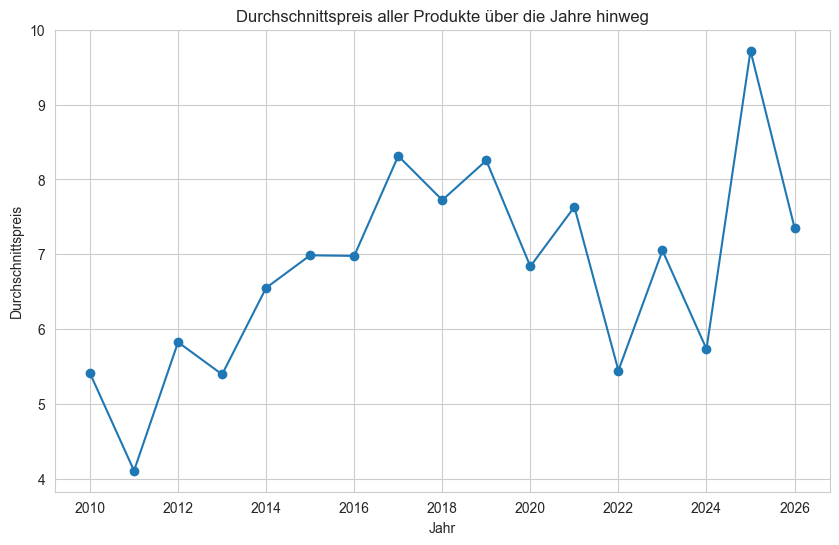

In [104]:
# Durchschnittspreis über die Jahre
plt.figure(figsize=(10, 6))
df.groupby('year')['price'].mean().plot(marker='o')
plt.title('Durchschnittspreis aller Produkte über die Jahre hinweg')
plt.xlabel('Jahr')
plt.ylabel('Durchschnittspreis')
plt.grid(True)
plt.show()

Das Diagramm zeigt die Entwicklung des Durchschnittspreises der Produkte über die Jahre hinweg. Auf der x-Achse sind die Jahre, und auf der y-Achse der Durchschnittspreis. Es wird eine Linie gezeichnet, die den Trend des Durchschnittspreises im Zeitverlauf veranschaulicht. Jeder Punkt auf der Linie stellt den Durchschnittspreis für ein bestimmtes Jahr dar.

## Kategorie-spezifische Analysen


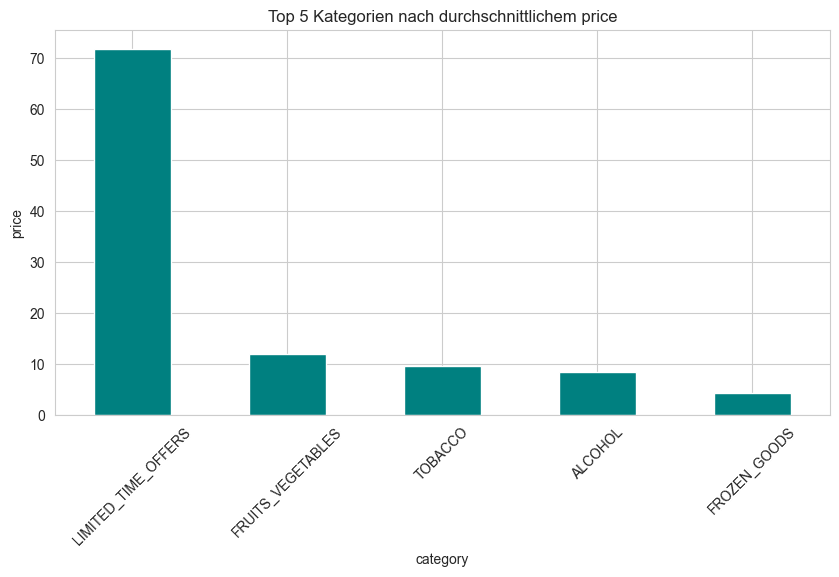

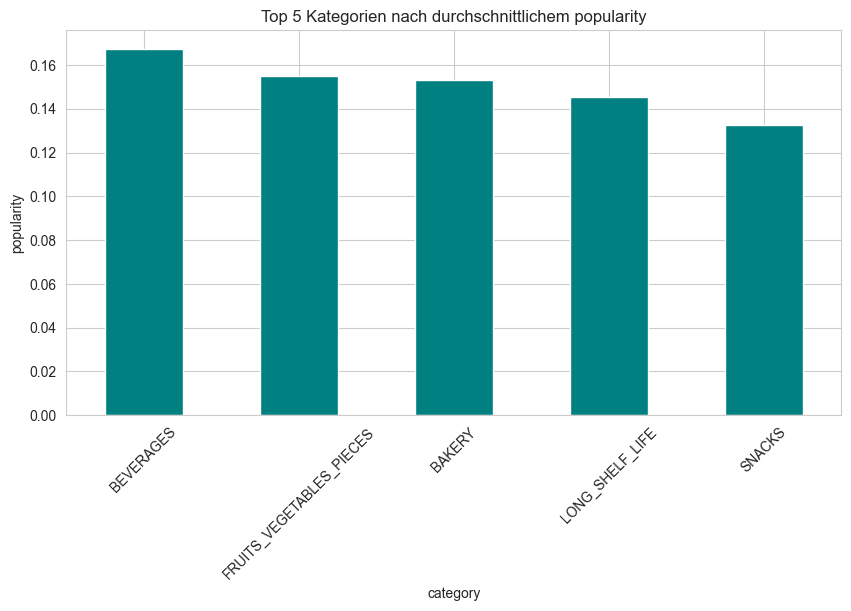

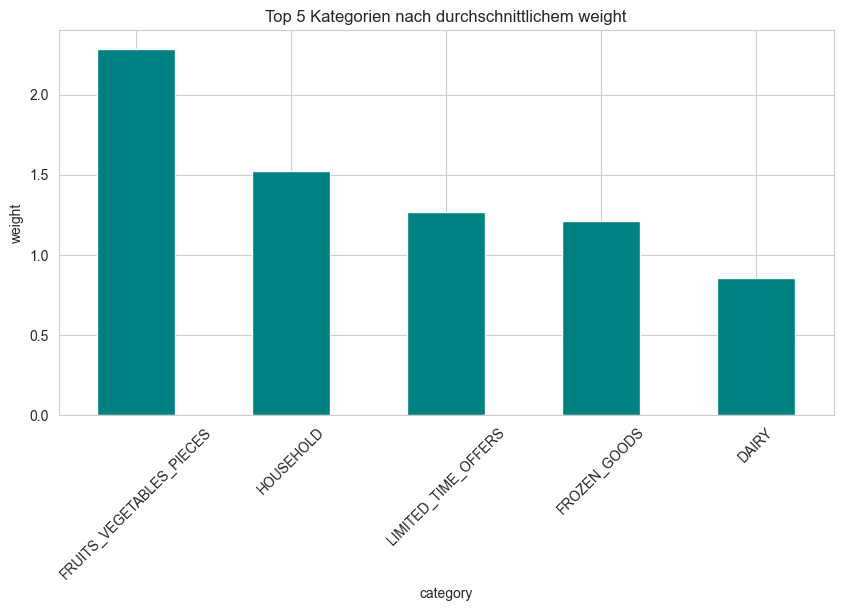

In [82]:
# Top Kategorien nach verschiedenen Metriken
metrics = ['price', 'popularity', 'weight']
for metric in metrics:
    top_cats = df.groupby('category')[metric].mean().nlargest(5)
    plt.figure(figsize=(10, 5))
    top_cats.plot(kind='bar', color='teal')
    plt.title(f'Top 5 Kategorien nach durchschnittlichem {metric}')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.show()

Top 5 Kategorien nach durchschnittlichem Preis: Zeigt die 5 Kategorien mit dem höchsten Durchschnittspreis.

Top 5 Kategorien nach durchschnittlicher Popularität: Zeigt die 5 Kategorien mit der höchsten durchschnittlichen Popularität.

Top 5 Kategorien nach durchschnittlichem Gewicht: Zeigt die 5 Kategorien mit dem höchsten durchschnittlichen Gewicht.

Für jede Metrik wird ein eigenes Diagramm erzeugt, das die besten Kategorien anhand der jeweiligen Metrik visualisiert.